In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import rc
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray, lat_weighted_mean_xarray

In [3]:
plt.rcParams['font.size'] = '6'

In [4]:
def plot_ds12_diff(ds_list,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    ax=axs[2]
    da = ds_list[1]-ds_list[0]
    da.plot(ax=ax, levels=dlevel, extend='both') 
    # ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
    fig.tight_layout()  
def plot_zonal_ta_diff(ds_list,level = np.arange(200,330,10), dlevel = np.arange(-3,3.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f}')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    # ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  



def plot_zonal_tdt_diff(ds_list,level = np.arange(-2,2,0.1), dlevel = np.arange(-0.5,0.51,0.05)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f} [K/day]')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f} [K/day]')   
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

def plot_GM_diff(ds_list,var_info):
    fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(3,2),dpi=200)
    ax=axs
    linesty = ['-', '--']
    for i in range(2): 
        # da = global_mean_xarray(ds_list[i].groupby('time.year').mean('time'))
        # ax.plot(da.year,da) 
        da = global_mean_xarray(ds_list[i])
        timeaxis = da.indexes['time'].to_datetimeindex()
        ax.plot(timeaxis,da,linestyle=linesty[i]) 
    if len(var_info) == 2: 
        ax.set_title(f'{var_info[0]} | {var_info[1]} = {da[var_info[1]].data}')   
    else:
        ax.set_title(f'{var_info}') 
    fig.tight_layout()  
    

# Climatology between HRadNN and control

#  import data

In [5]:
year_list = np.arange(1996,2005)

In [6]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_nn= ds.rename({'grid_yt':'lat','grid_xt':'lon'}).load()

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_ba= ds.rename({'grid_yt':'lat','grid_xt':'lon'}).load()

In [7]:
ds_nn

<xarray.Dataset>
Dimensions:       (time: 108, bnds: 2, lat: 180, lon: 288, pfull: 33, phalf: 34)
Coordinates:
  * time          (time) object 1996-01-16 12:00:00 ... 2004-12-16 12:00:00
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon           (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * pfull         (pfull) float64 2.164 5.845 10.75 17.11 ... 985.4 992.8 997.9
  * phalf         (phalf) float64 1.0 4.0 8.186 13.79 ... 989.7 995.9 1e+03
Dimensions without coordinates: bnds
Data variables: (12/27)
    time_bnds     (time, bnds) timedelta64[ns] 51636 days 01:16:18.871345152 ...
    grid_yt_bnds  (time, lat, bnds) float64 -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    grid_xt_bnds  (time, lon, bnds) float64 0.0 1.25 1.25 ... 358.8 358.8 360.0
    t_surf        (time, lat, lon) float32 251.4 251.4 251.4 ... 245.1 245.1
    ps            (time, lat, lon) float32 6.793e+04 6.793e+04 ... 1.027e+05
    temp          (time, pfull, lat, lon) float32 279.3 279.3 ... 245.7 245.7
    ...            ...
    swup_sfc_clr  (time, lat, lon) float32 324.4 324.4 324.4 ... 0.0 0.0 0.0
    olr_clr       (time, lat, lon) float32 201.6 201.6 201.6 ... 176.4 176.4
    swup_toa_clr  (time, lat, lon) float32 327.7 327.7 327.7 ... 0.0 0.0 0.0
    average_T1    (time) datetime64[ns] 1996-01-14 1996-02-14 ... 2004-12-14
    average_T2    (time) datetime64[ns] 1996-02-14 1996-03-14 ... 2005-01-14
    average_DT    (time) timedelta64[ns] 31 days 29 days ... 30 days 31 days
Attributes:
    title:         c96L33_am4p0
    grid_type:     regular
    grid_tile:     N/A
    history:       /projects/GEOCLIM/hengquan/fre-nctools/build_stellarAMD/in...
    code_version:  $Name: bronx-10_performance_z1l $

# plot results

In [7]:
ts = ds_ba.t_surf

ts_anom = ts.groupby('time.month')- ts.groupby('time.month').mean('time')
ts_anom_gm = global_mean_xarray(ts_anom).groupby('time.year').mean('time')
nino34 = ts_anom.sel(lon = slice(190,240)).sel(lat = slice(-5,5)).mean(['lat','lon']).rolling(time=12,center=True).mean() 

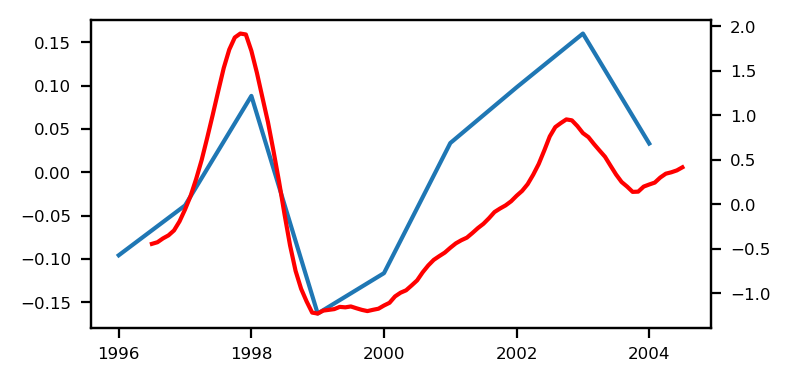

In [8]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(4,2),dpi=200)
axs.plot(np.arange(1996,2005,1),ts_anom_gm)
ax = axs.twinx()
ax.plot(np.arange(1996,2005,1/12),nino34,color='red')

## temp sturcture

GM trend


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


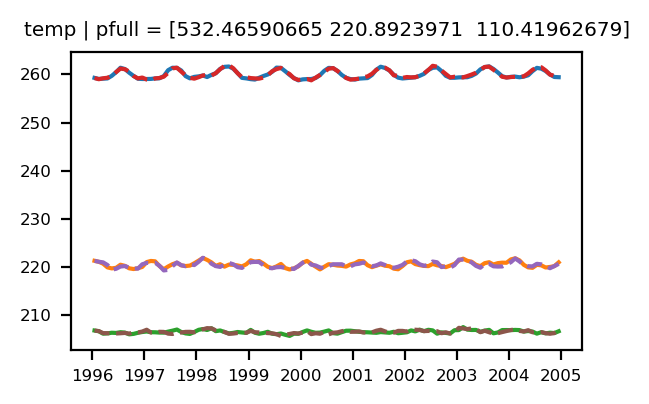

In [9]:
print('GM trend')
var = 'temp'
ds_list = [ds_ba[var].sel(pfull=[500,200,100],method='nearest'),
           ds_nn[var].sel(pfull=[500,200,100],method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull']) 


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
 

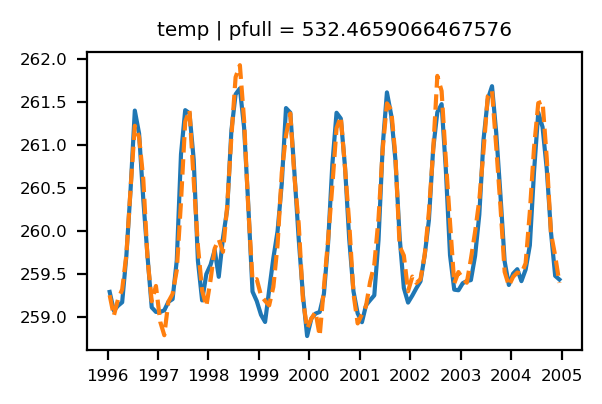

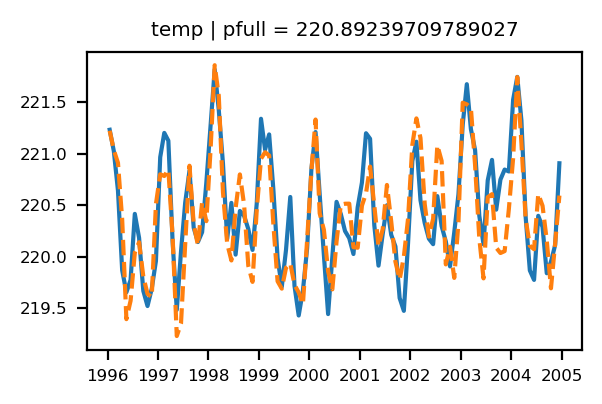

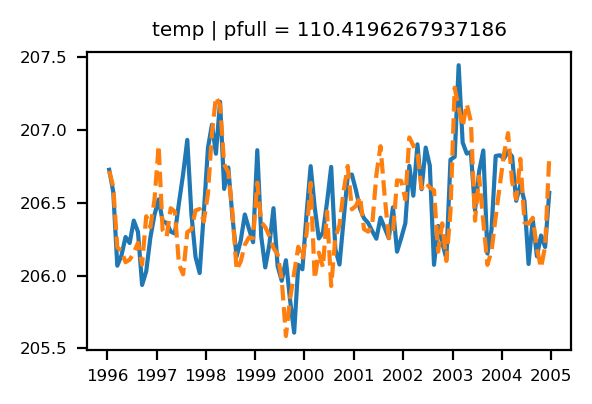

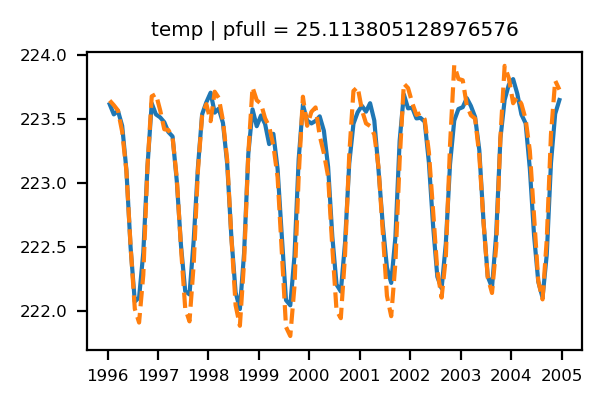

In [10]:

print('GM trend')
var = 'temp'
ds_list = [ds_ba[var].sel(pfull=500,method='nearest'),
           ds_nn[var].sel(pfull=500,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=200,method='nearest'),
           ds_nn[var].sel(pfull=200,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=100,method='nearest'),
           ds_nn[var].sel(pfull=100,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=30,method='nearest'),
           ds_nn[var].sel(pfull=30,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])


GM trend


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


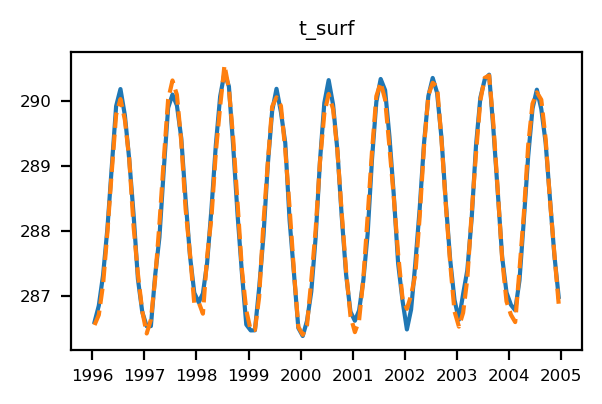

In [11]:
var = 't_surf' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


GM trend


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
 

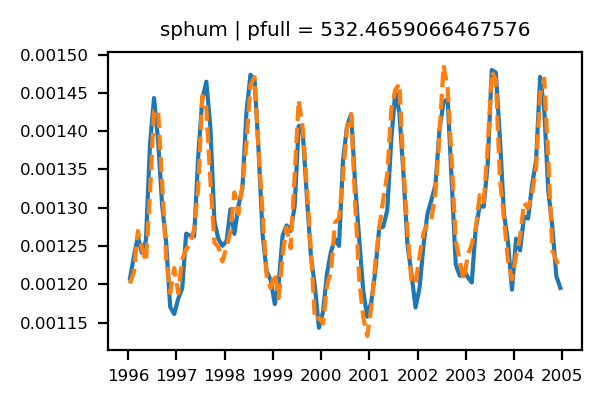

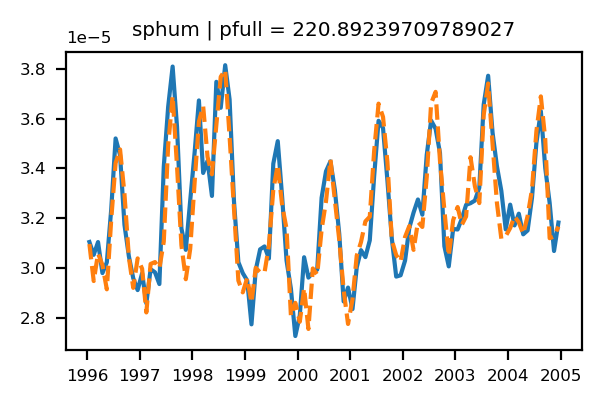

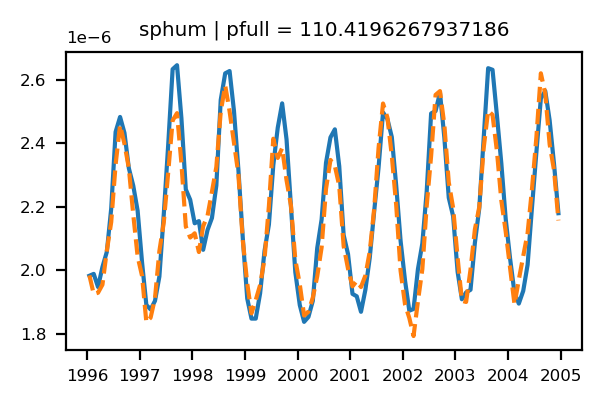

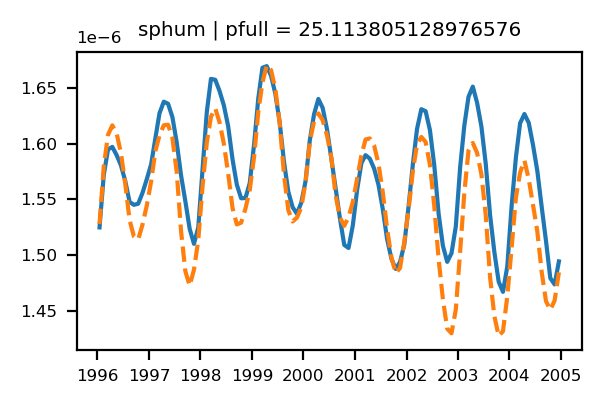

In [12]:

print('GM trend')
var = 'sphum'
ds_list = [ds_ba[var].sel(pfull=500,method='nearest'),
           ds_nn[var].sel(pfull=500,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=200,method='nearest'),
           ds_nn[var].sel(pfull=200,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=100,method='nearest'),
           ds_nn[var].sel(pfull=100,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=30,method='nearest'),
           ds_nn[var].sel(pfull=30,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])


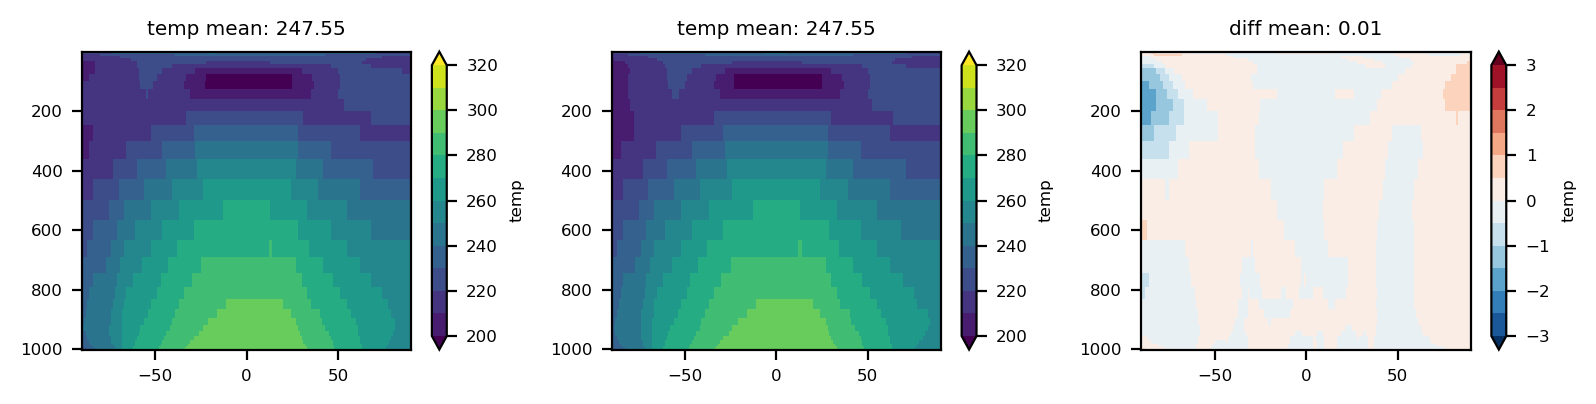

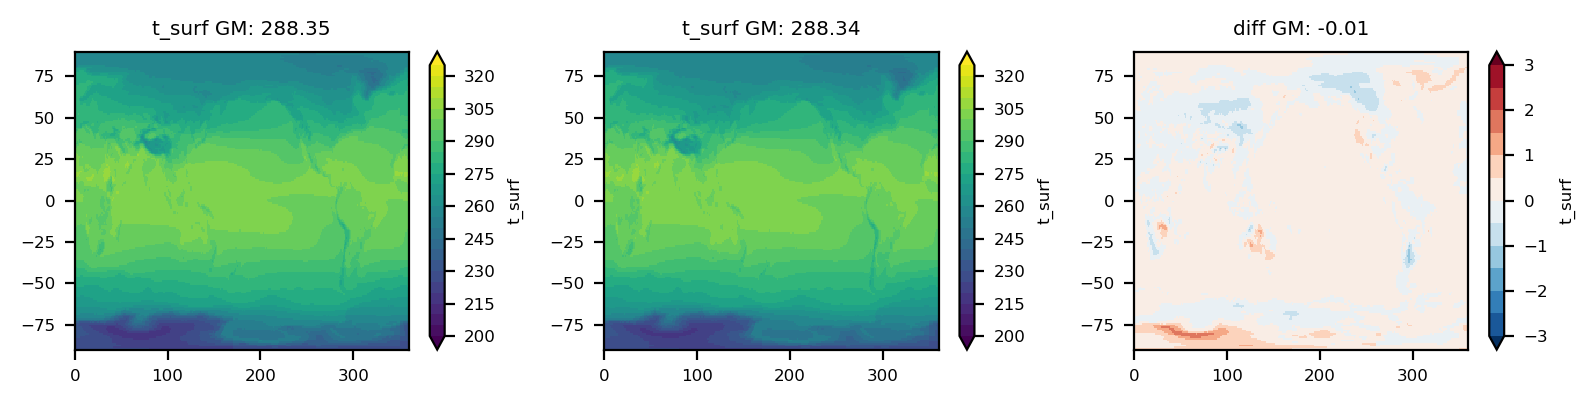

In [13]:
var = 'temp'
ds_list = [ds_ba[var].mean(['time','lon']).load(),
           ds_nn[var].mean(['time','lon']).load()]
plot_zonal_ta_diff(ds_list)

var = 't_surf'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(200,330,5), dlevel = np.arange(-3,3.1,0.5)) 

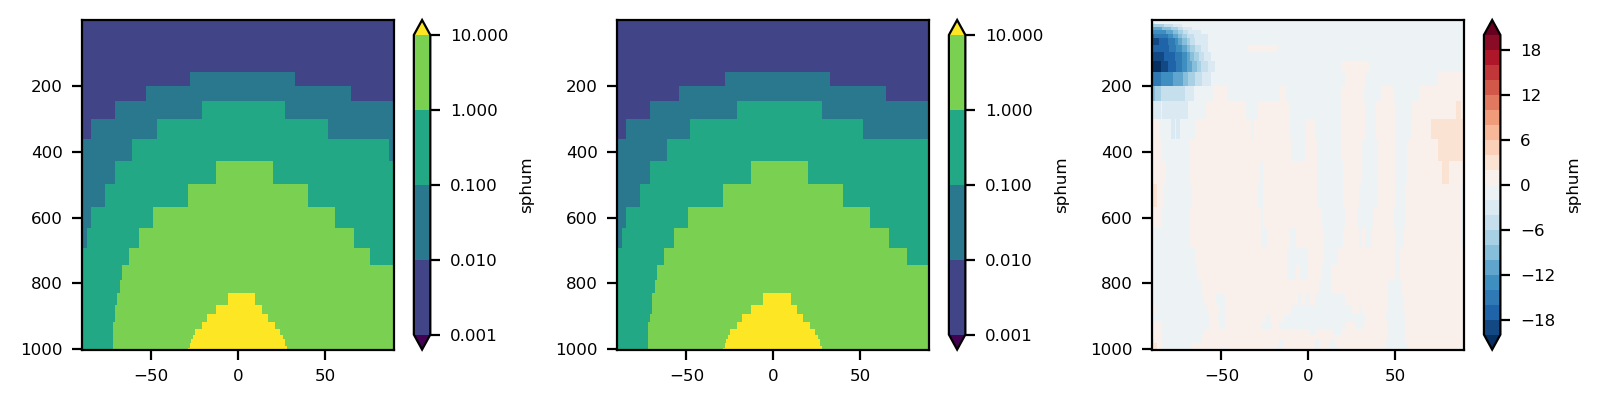

In [14]:
def plot_zonal_sphum_diff(ds_list, level = 10**np.arange(-5,2.0,1.0), 
                          dlevel = np.arange(0,5,0.1)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        # ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f}')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])/ds_list[0]*100
    da.plot(ax=ax, levels=dlevel, extend='both') 
    # ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    # ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  
    
var = 'sphum'
ds_list = [ds_ba[var].mean(['time','lon']).load()*1e3,
           ds_nn[var].mean(['time','lon']).load()*1e3] # g/kg
loglevel = 10**np.arange(-3,2.0,1)
dlevel = np.arange(-20,20.01,2)
plot_zonal_sphum_diff(ds_list,level=loglevel,dlevel=dlevel)


### lw flux by Rad_AM4

GM trend
GM trend


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
 

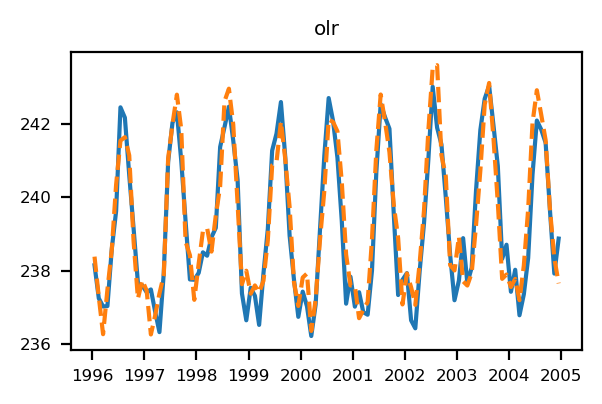

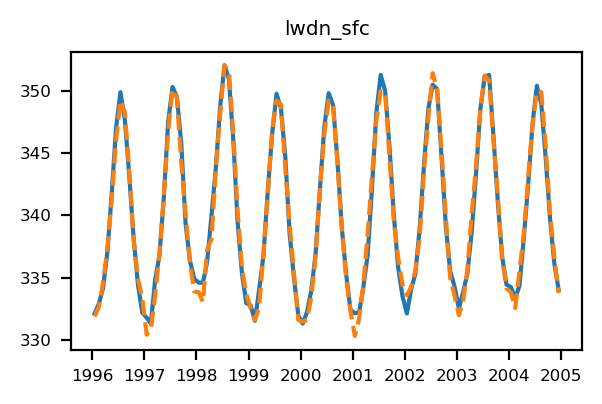

In [15]:
var = 'olr' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 
var = 'lwdn_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


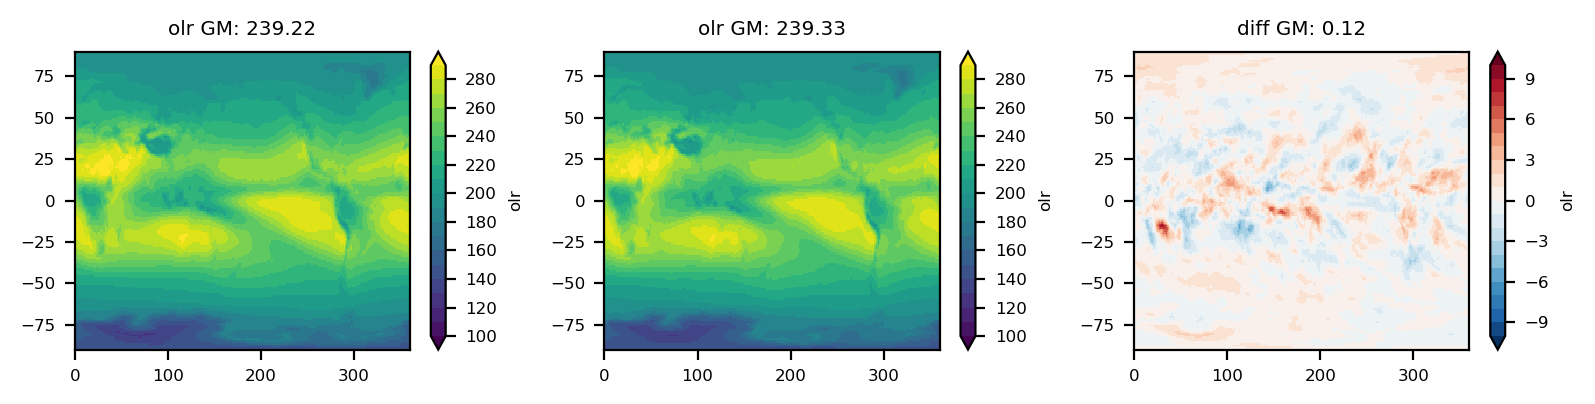

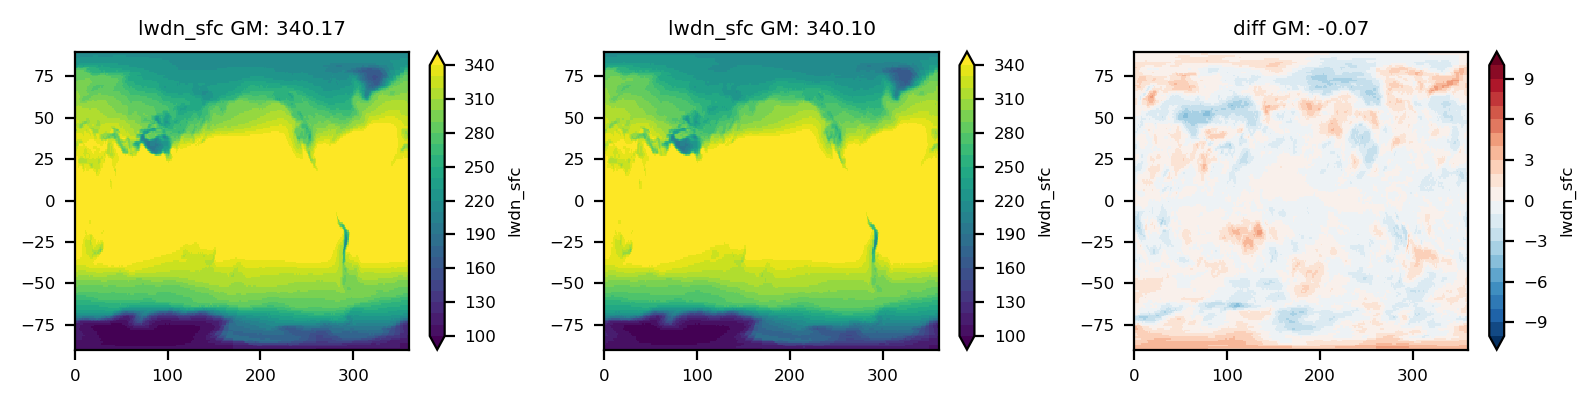

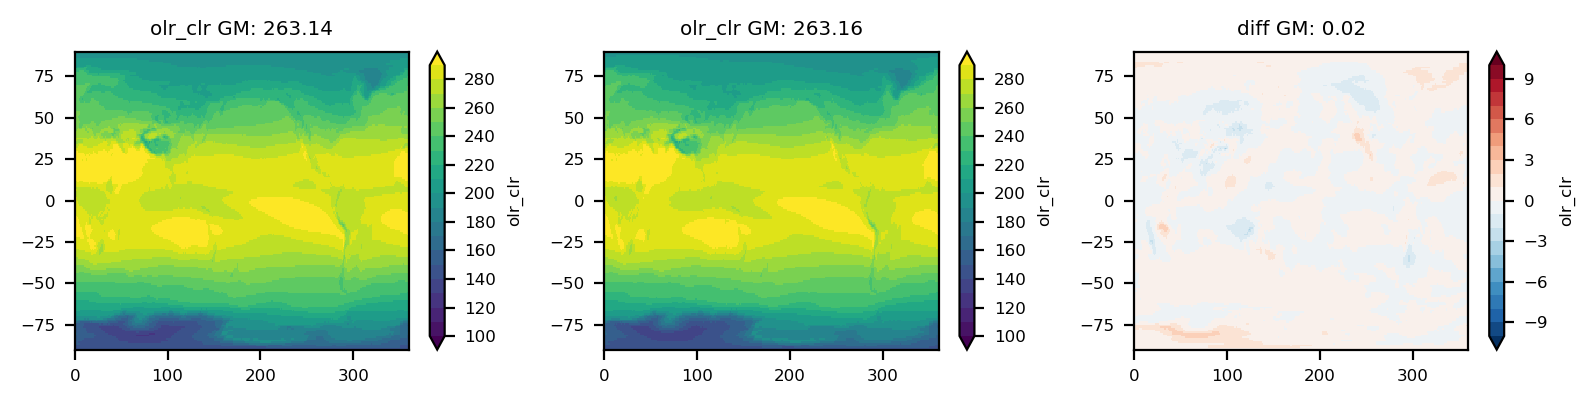

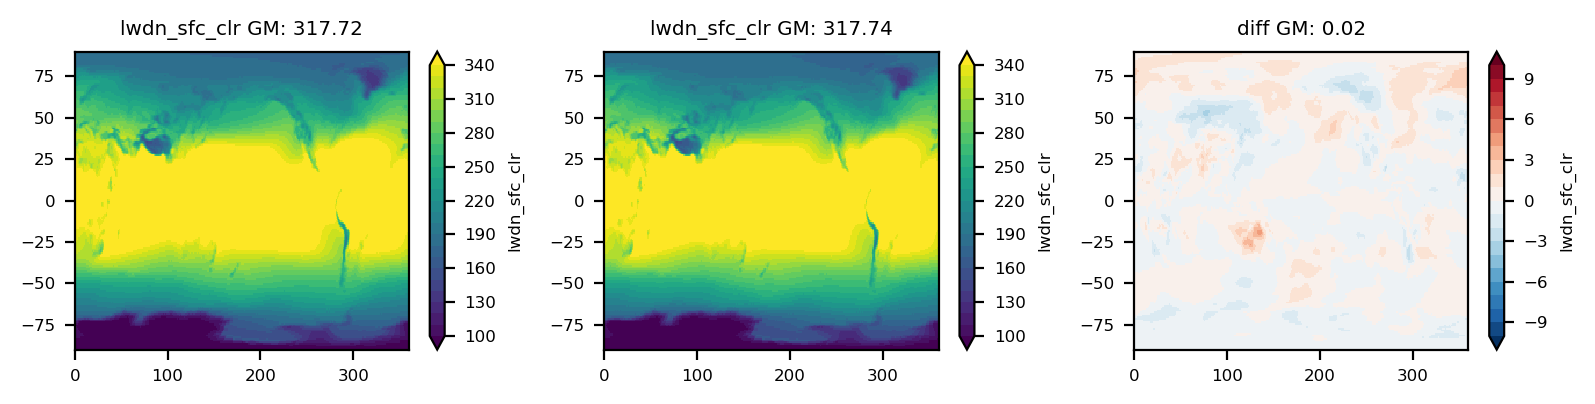

In [16]:
var = 'olr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

var = 'lwdn_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,350,10), dlevel = np.arange(-10,10.1,1)) 
var = 'olr_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

var = 'lwdn_sfc_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,350,10), dlevel = np.arange(-10,10.1,1)) 

### sw flux by Rad_AM4

GM trend
GM trend
GM trend


/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_769458/1972825539.py:62: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
 

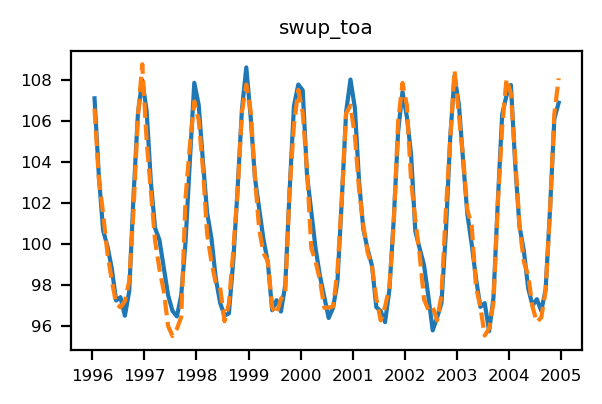

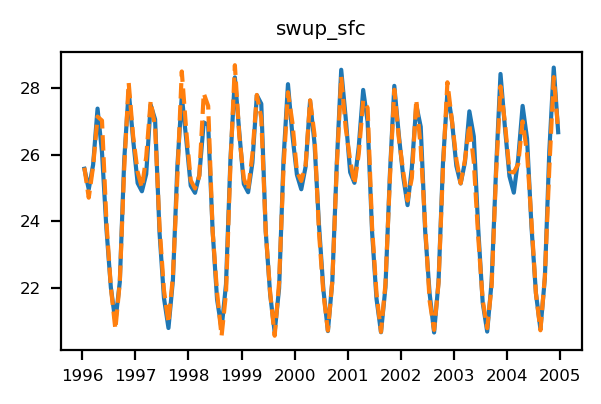

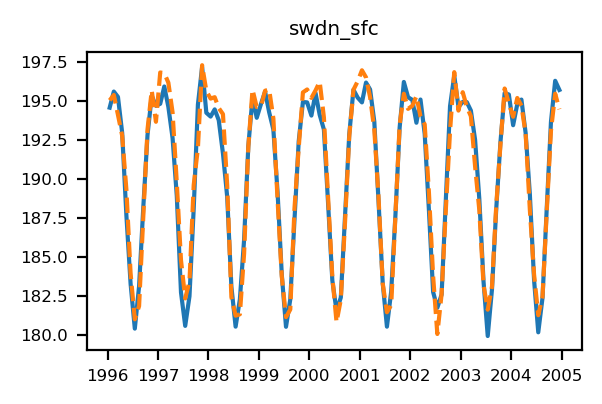

In [17]:
var = 'swup_toa' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var)
var = 'swup_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 
var = 'swdn_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


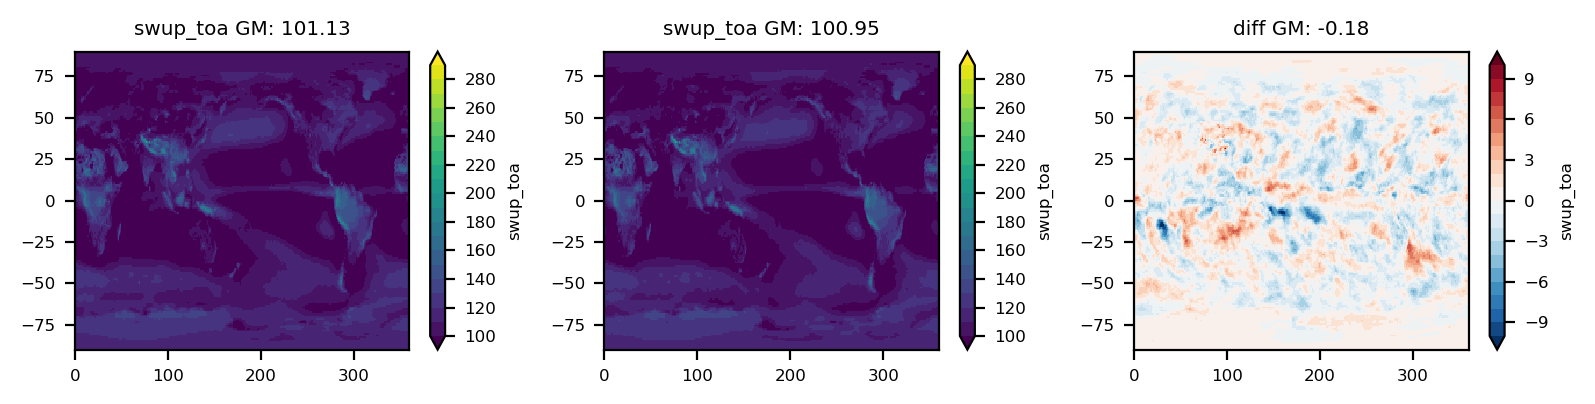

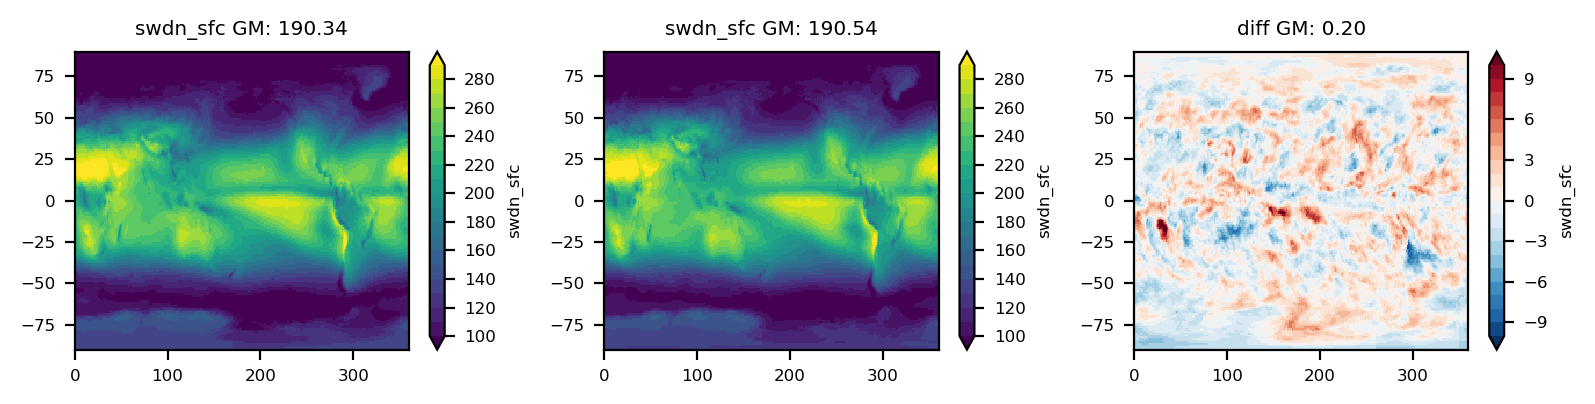

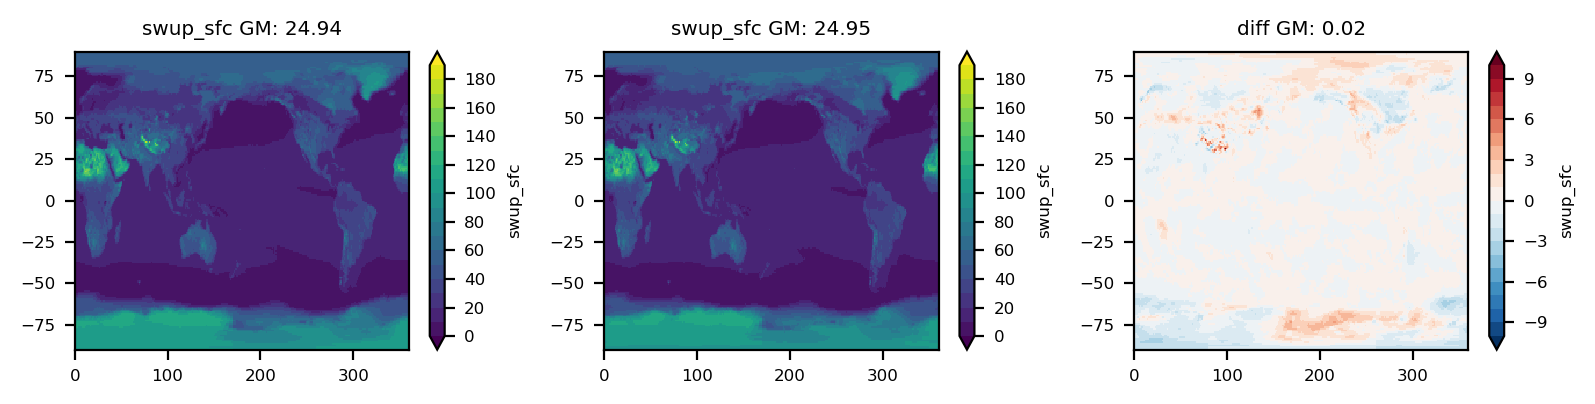

In [18]:
var = 'swup_toa'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 
var = 'swdn_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1))
var = 'swup_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-10,10.1,1))  

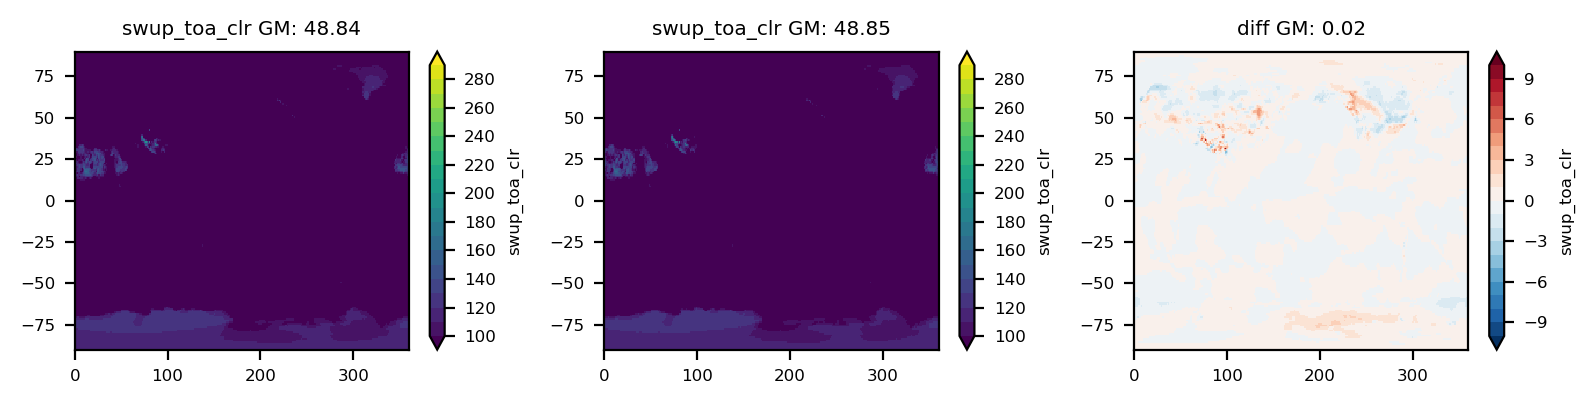

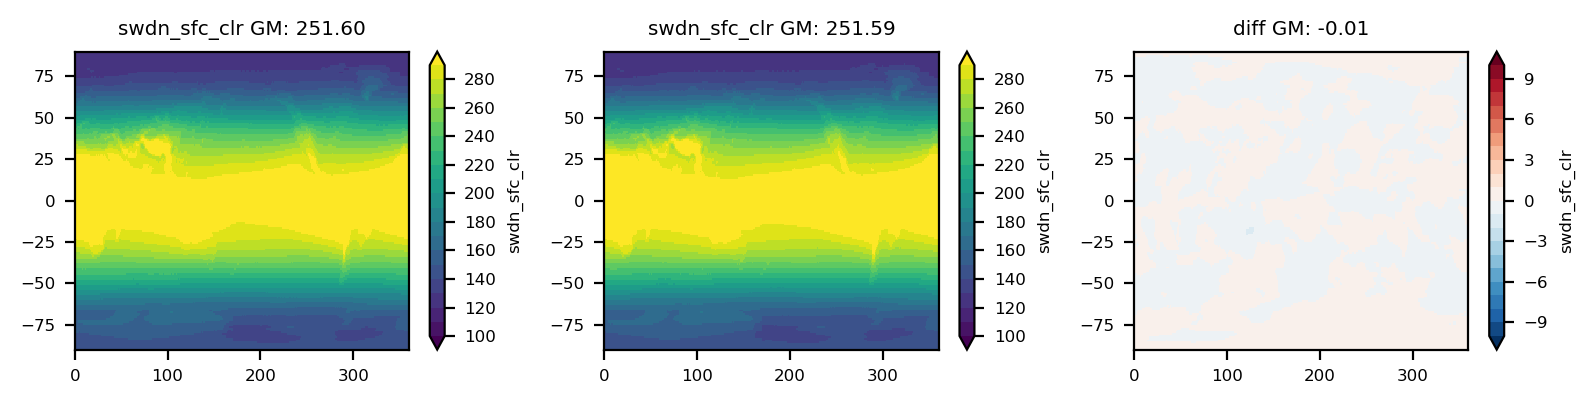

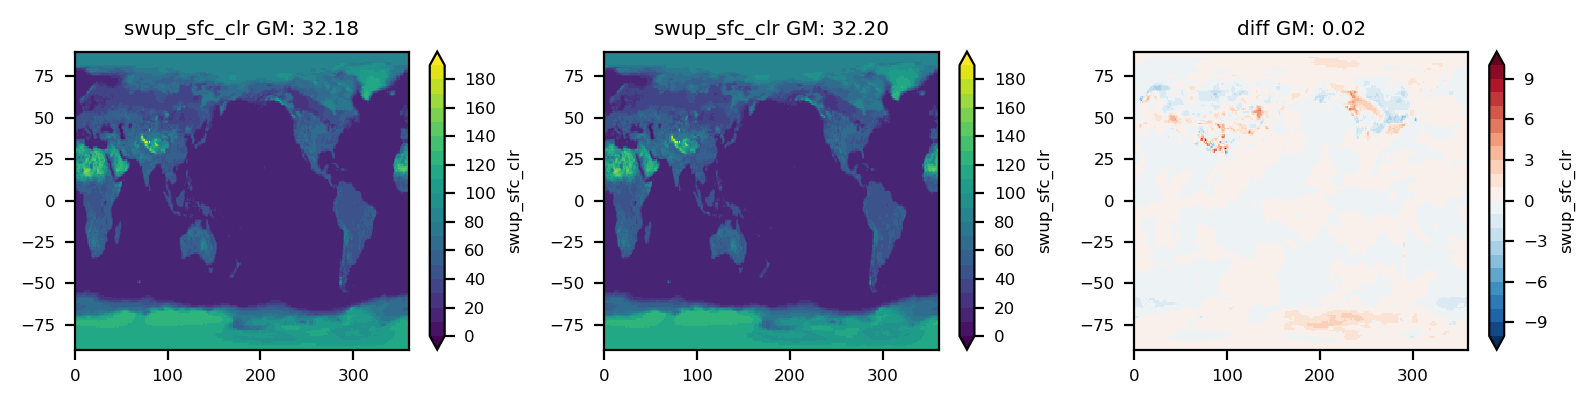

In [19]:
var = 'swup_toa_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 
var = 'swdn_sfc_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1))
var = 'swup_sfc_clr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-10,10.1,1))  

# HRadNN/RadNN performance on instantaneous steps

In [31]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
ds= xr.open_mfdataset([file_path+f'HISTORY/{year}0101.atmos_8xdaily.monavg_error.nc' for year in year_list])  
ds_nn_3h = ds.rename({'grid_yt':'lat','grid_xt':'lon'}).load()

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'HISTORY/{year}0101.atmos_8xdaily.monavg_error.nc' for year in year_list])  
ds_ba_3h = ds.rename({'grid_yt':'lat','grid_xt':'lon'}).load()

## error of all- and clear-sky in time series

In [32]:
ori_var = [
    'olr',
    'lwdn_sfc',
    'swup_toa',
    'swdn_sfc',
    'swup_sfc',
]

olr
lwdn_sfc
swup_toa
swdn_sfc
swup_sfc


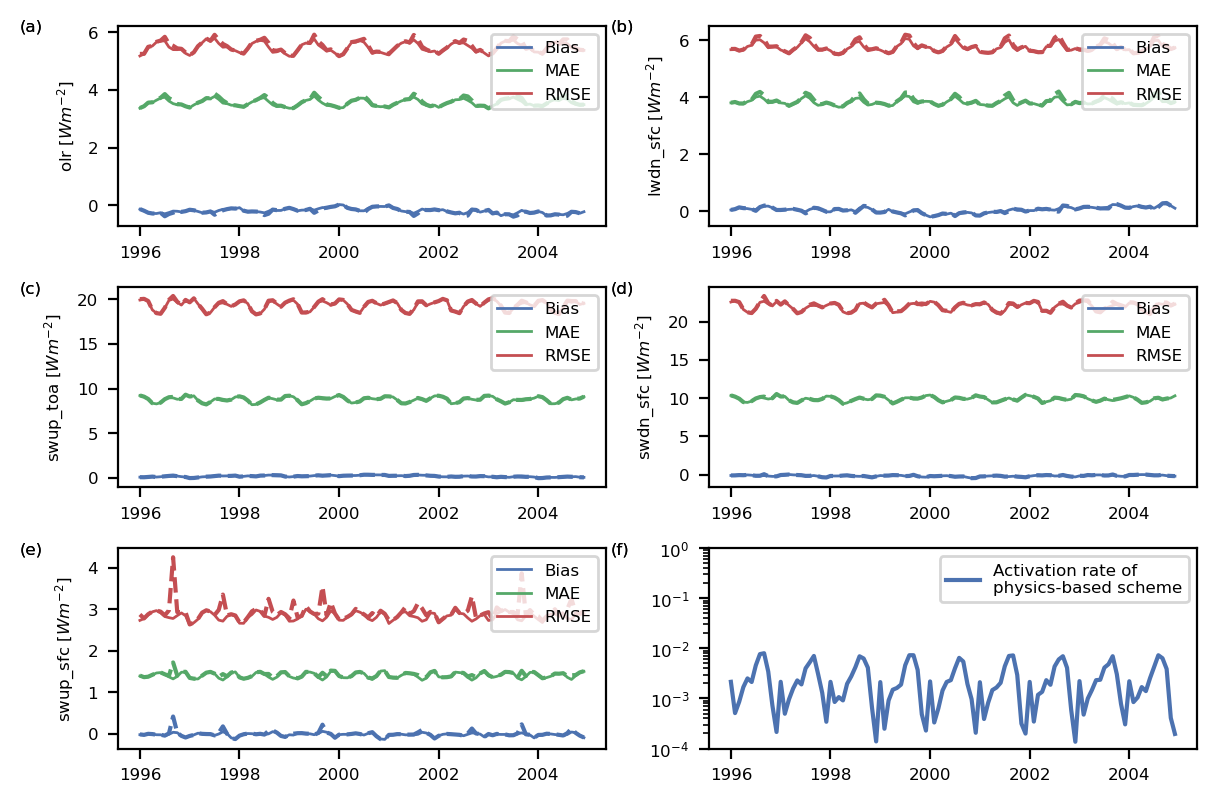

In [68]:

error_name = {'bias':'Bias','mae':'MAE','rmse':'RMSE'}
plt.style.reload_library()
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(nrows=3,ncols=2,
                        figsize=(6,4), dpi=200)
axs = axs.flatten() 
for si, svar in enumerate(ori_var):
    ax=axs[si] 
    print(svar)
    var_name = svar 
    for err_ind in ['bias','mae','rmse']:
    # for err_ind in ['bias']:
        da_plot = ds_nn_3h[f'{err_ind}_{var_name}']
        gm_value = global_mean_xarray(da_plot).values  
        x_label = np.arange(1996,2005.0,1/12)
        p = ax.plot(x_label,gm_value,'--')
        da_plot = ds_nn_3h[f'adj_{err_ind}_{var_name}']
        gm_value = global_mean_xarray(da_plot).values  
        ax.plot(x_label,gm_value,color =  p[0].get_color(),label=f'{error_name[err_ind]}', linewidth=1)
    ax.set_ylabel(f'{var_name}'+' $[W m^{-2}]$') 
    ax.legend(loc=1)
# plot ratio of RadNN fails
da_plot = ds_nn_3h['nn_lwup_sfc']
gm_value = (1-global_mean_xarray(da_plot).values/999)/2
# axs[5].set_title() 
axs[5].plot(x_label,gm_value,label='Activation rate of\nphysics-based scheme')
axs[5].set_ylim([1e-4,1])
axs[5].set_yscale('log')
axs[5].legend(loc=1)
abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
fig.tight_layout()
plt.savefig('fig6_allsky_nn.pdf')

olr
lwdn_sfc
swup_toa
swdn_sfc
swup_sfc


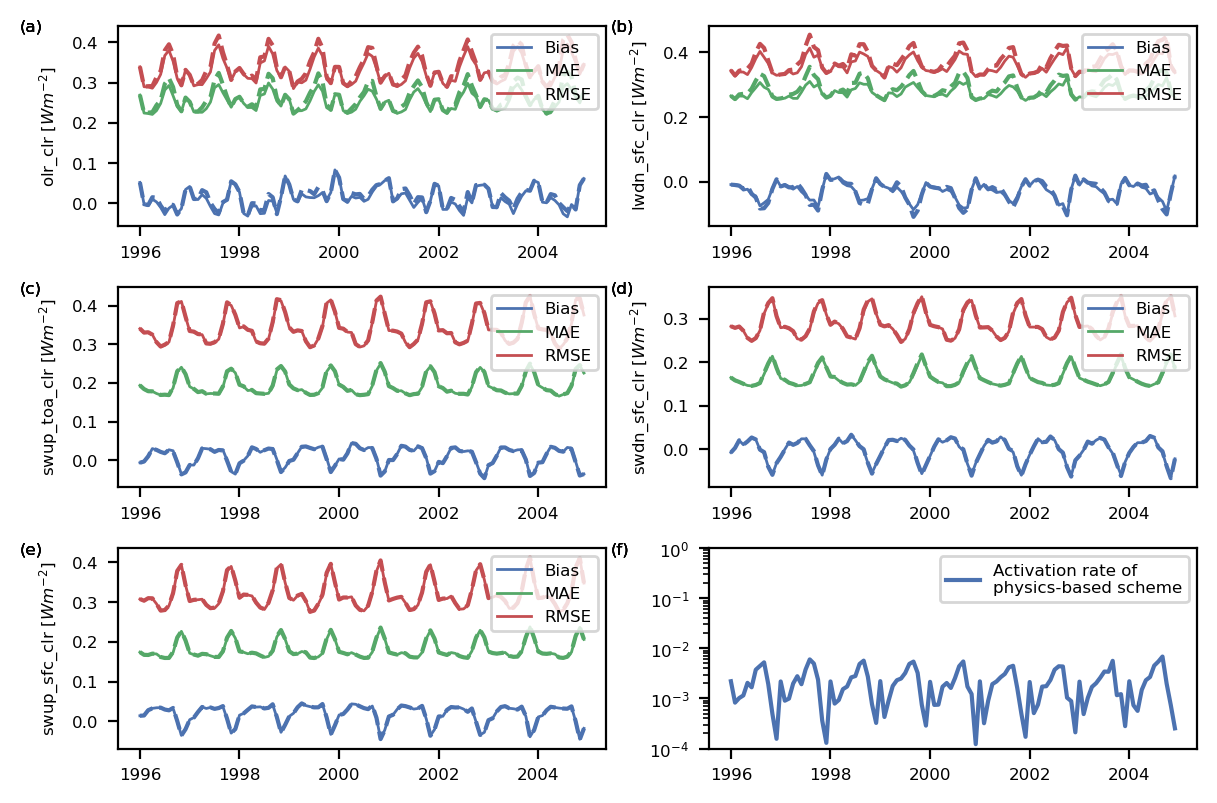

In [34]:
# diagnostic mode
plt.style.reload_library()
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(nrows=3,ncols=2,
                        figsize=(6,4), dpi=200)
axs = axs.flatten() 
for si, svar in enumerate(ori_var):
    ax=axs[si] 
    print(svar)
    var_name = svar 
    for err_ind in ['bias','mae','rmse']:
    # for err_ind in ['bias']:
        da_plot = ds_ba_3h[f'{err_ind}_{var_name}_clr']
        gm_value = global_mean_xarray(da_plot).values  
        x_label = np.arange(1996,2005.0,1/12)
        p = ax.plot(x_label,gm_value,'--')
        da_plot = ds_ba_3h[f'adj_{err_ind}_{var_name}_clr']
        gm_value = global_mean_xarray(da_plot).values  
        ax.plot(x_label,gm_value,color =  p[0].get_color(),label=f'{error_name[err_ind]}', linewidth=1)
    ax.set_ylabel(f'{var_name}_clr'+' $[W m^{-2}]$') 
    ax.legend(loc=1)
# plot ratio of RadNN fails
da_plot = ds_ba_3h['nn_lwup_sfc']
gm_value = (1-global_mean_xarray(da_plot).values/999)/2
# axs[5].set_title() 
axs[5].plot(x_label,gm_value,label='Activation rate of\nphysics-based scheme')
axs[5].set_ylim([1e-4,1])
axs[5].set_yscale('log')
axs[5].legend(loc=1) 
abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
fig.tight_layout()

olr
lwdn_sfc
swup_toa
swdn_sfc
swup_sfc


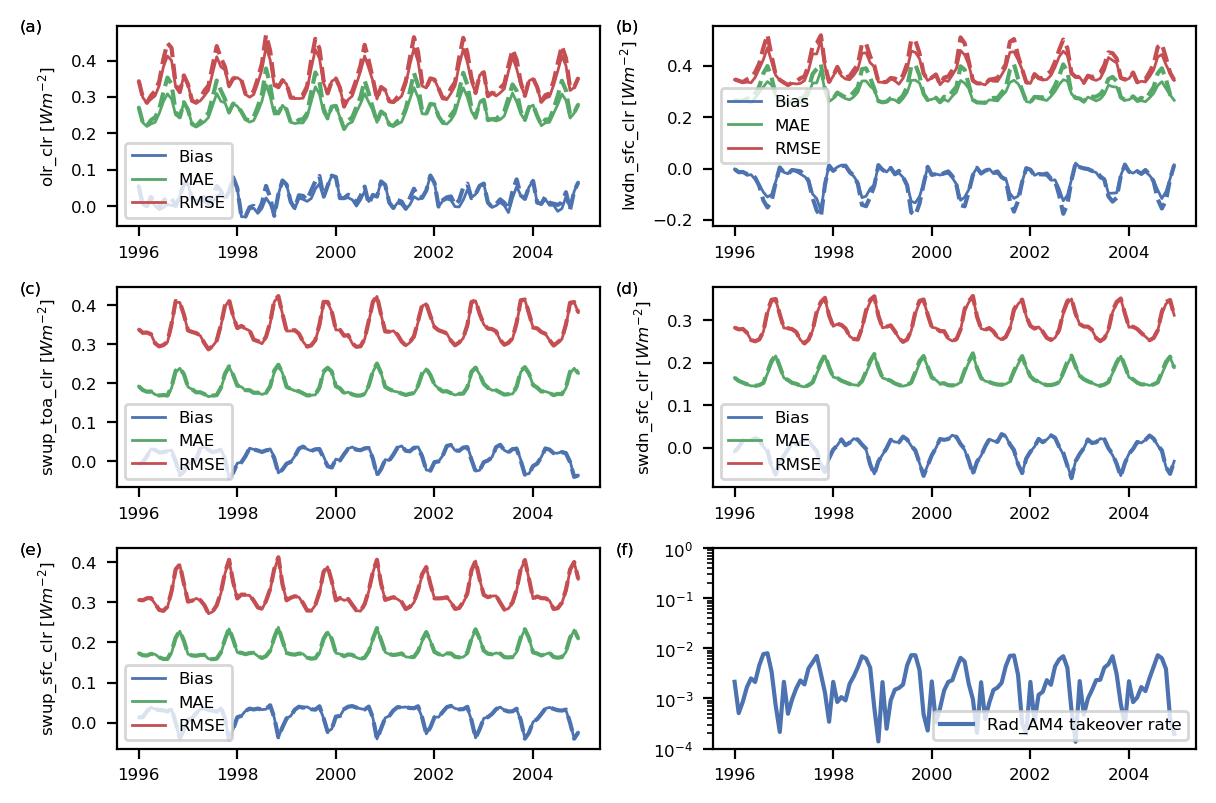

In [35]:
#clr
error_name = {'bias':'Bias','mae':'MAE','rmse':'RMSE'}
plt.style.reload_library()
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(nrows=3,ncols=2,
                        figsize=(6,4), dpi=200)
axs = axs.flatten() 
for si, svar in enumerate(ori_var):
    ax=axs[si] 
    print(svar)
    var_name = svar 
    for err_ind in ['bias','mae','rmse']:
    # for err_ind in ['bias']:
        da_plot = ds_nn_3h[f'{err_ind}_{var_name}_clr']
        gm_value = global_mean_xarray(da_plot).values  
        x_label = np.arange(1996,2005.0,1/12)
        p = ax.plot(x_label,gm_value,'--')
        da_plot = ds_nn_3h[f'adj_{err_ind}_{var_name}_clr']
        gm_value = global_mean_xarray(da_plot).values  
        ax.plot(x_label,gm_value,color =  p[0].get_color(),label=f'{error_name[err_ind]}', linewidth=1)
    ax.set_ylabel(f'{var_name}_clr'+' $[W m^{-2}]$') 
    ax.legend(loc=0)
# plot ratio of RadNN fails
da_plot = ds_nn_3h['nn_lwup_sfc']
gm_value = (1-global_mean_xarray(da_plot).values/999)/2
# axs[5].set_title() 
axs[5].plot(x_label,gm_value,label='Rad_AM4 takeover rate')
axs[5].set_ylim([1e-4,1])
axs[5].set_yscale('log')
axs[5].legend(loc=4)

abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
fig.tight_layout()

## map of errors

In [36]:
year_sel = np.arange(1996,2005)

mon_sel=np.arange(1,13)
time_sel = (ds_nn_3h.time.dt.year.isin(year_sel) * ds_nn_3h.time.dt.month.isin(mon_sel))

In [37]:
def plot_var_bias_mae(ds,var_name,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(6,1),dpi=200,
                            subplot_kw={'projection': ccrs.PlateCarree()})
    axs = axs.flatten()
    da = ds[var_name].mean('time')
    da.plot(ax=axs[0], levels=level, extend='both')  
    axs[0].set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}')   
    # print(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    
    da = ds[f'bias_{var_name}'].mean('time')
    da.plot(ax=axs[1], levels=dlevel, extend='both')  
    axs[1].set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}')  
    # print(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    
    da = ds[f'mae_{var_name}'].mean('time')
    da.plot(ax=axs[2], levels=dlevel, extend='both')  
    axs[2].set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}')  
    # print(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.coastlines()
    fig.tight_layout()  

### lw

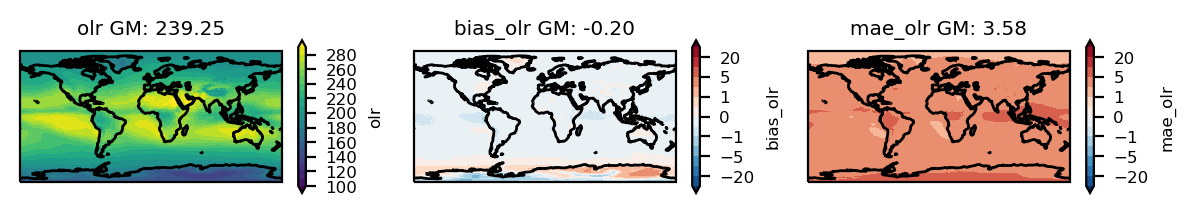

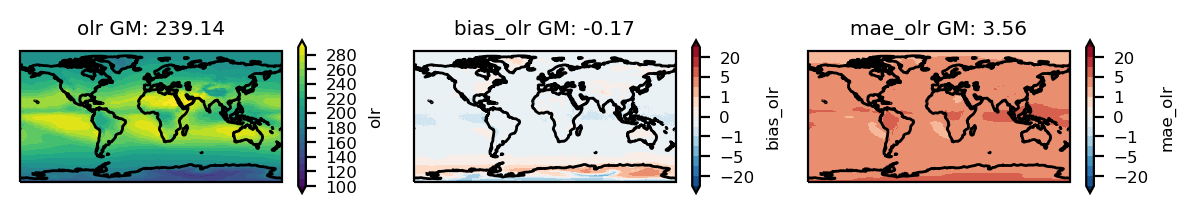

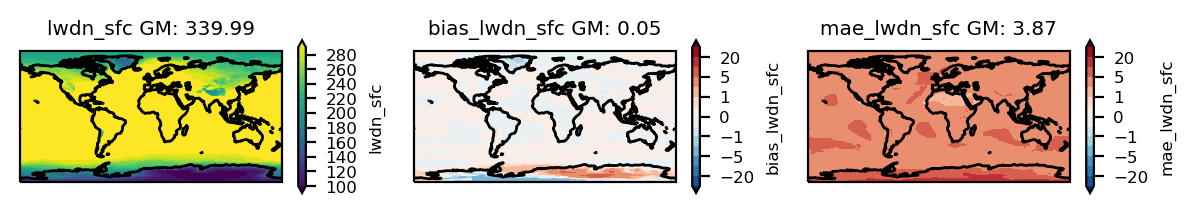

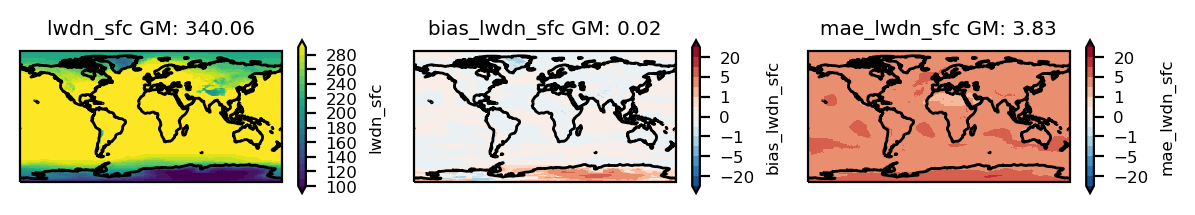

In [38]:
dlevel = np.array([-50, -20, -10, -5,-2,-1,-0.5,0,0.5,1,2,5,10,20,50])  

plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'olr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'olr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'lwdn_sfc',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'lwdn_sfc',level = np.arange(100,300,10), dlevel=dlevel)

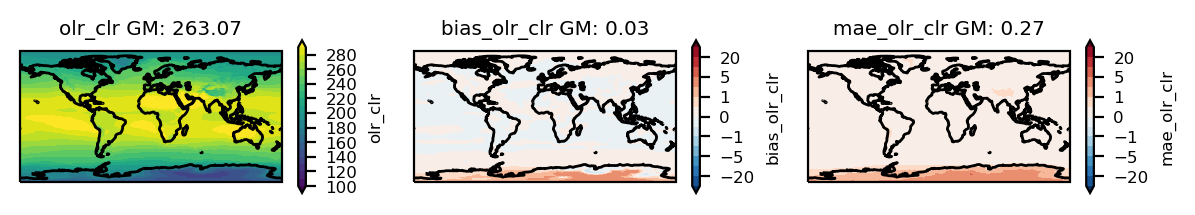

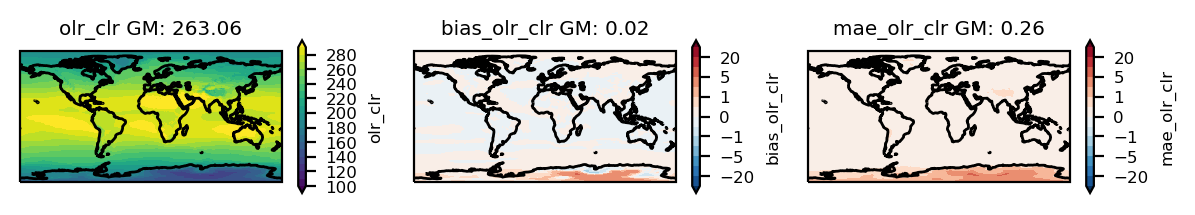

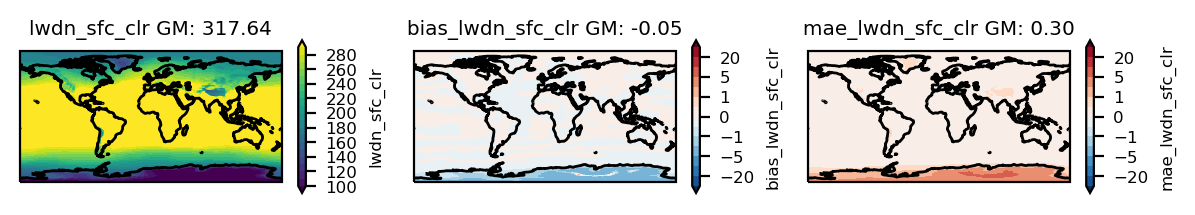

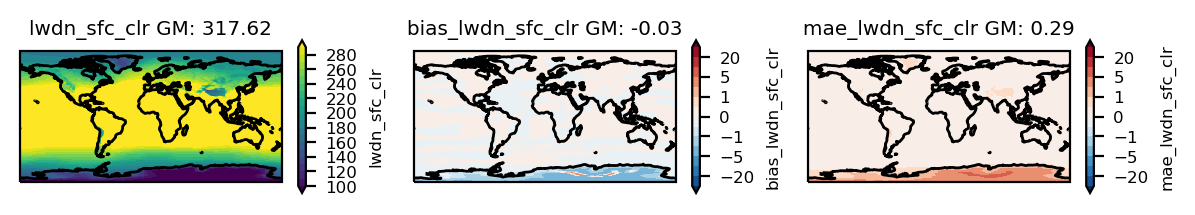

In [39]:
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'olr_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'olr_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'lwdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'lwdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel)

In [40]:
def plot_zonal_tdt_bias_mae(ds,var_name,level = np.arange(-2,2.01,0.1), dlevel = np.arange(-0.5,0.51,0.05)):
    
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(6,1),dpi=200)
    axs = axs.flatten()

    axs = axs.flatten()
    da = ds[var_name].mean(['time','lon']).load()*86400
    da.plot(ax=axs[0], levels=level, extend='both')  
    axs[0].set_title(f'{da.name} Mean: {lat_weighted_mean_xarray(da).mean().values:4.2f}') 
    # print(f'{da.name} Mean: {lat_weighted_mean_xarray(da).mean().values:4.2f}') 
    
    da = ds[f'bias_{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[1], levels=dlevel, extend='both')  
    axs[1].set_title(f'{da.name} Mean: {lat_weighted_mean_xarray(da).mean().values:4.2f}') 
    # print(f'{da.name} Mean: {lat_weighted_mean_xarray(da).mean().values:4.2f}')  
    
    da = ds[f'mae_{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[2], levels=dlevel, extend='both')  
    axs[2].set_title(f'{da.name} Mean: {lat_weighted_mean_xarray(da).mean().values:4.2f}') 
    # print(f'{da.name} Mean: {lat_weighted_mean_xarray(da).mean().values:4.2f}')  
    
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

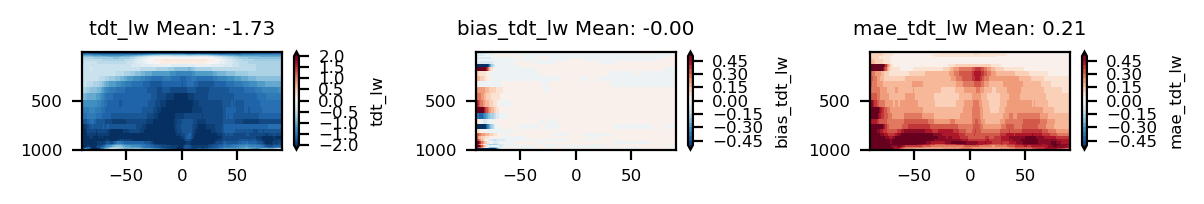

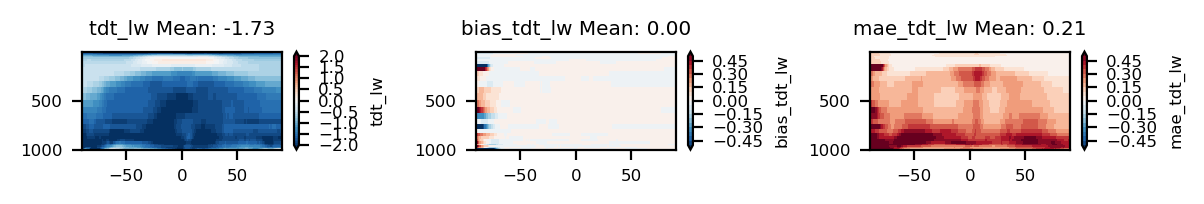

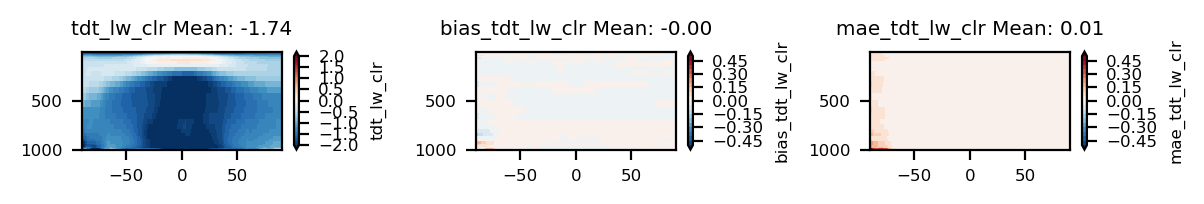

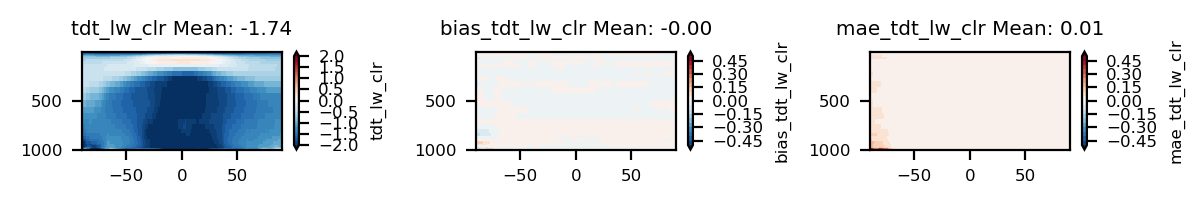

In [41]:
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_lw')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_lw')
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_lw_clr')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_lw_clr')

### sw

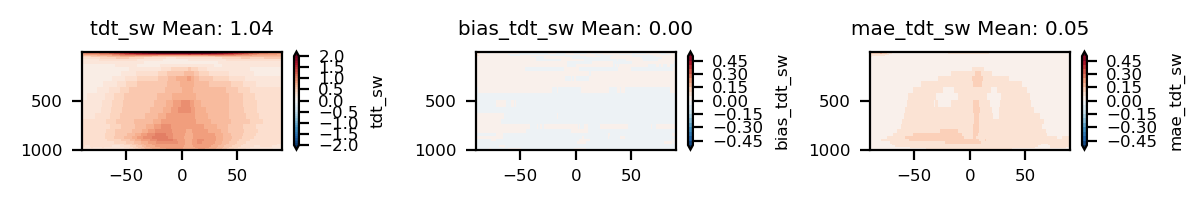

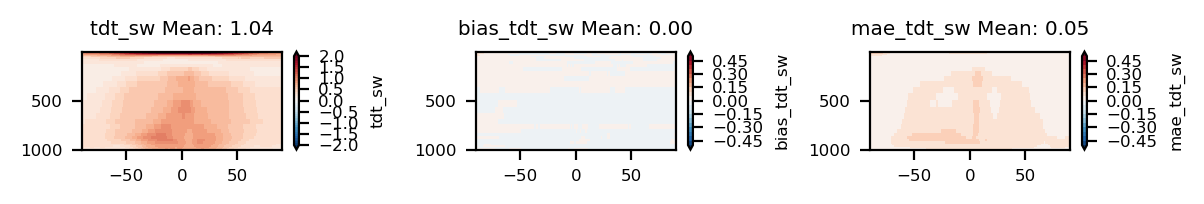

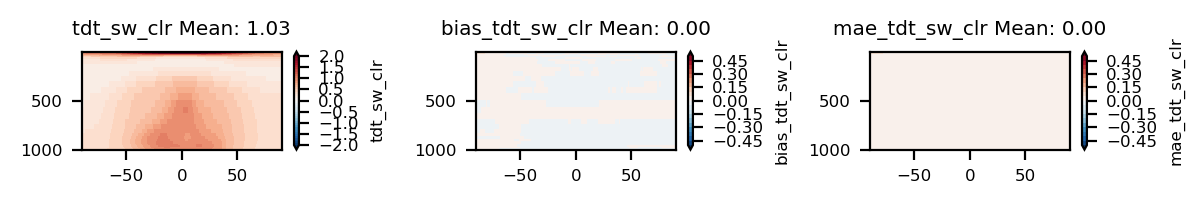

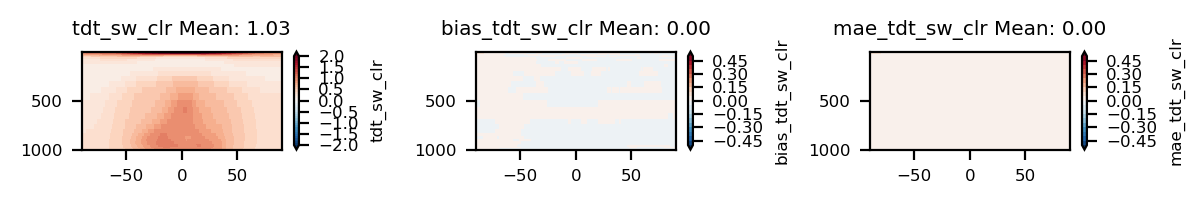

In [42]:
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_sw')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_sw')
plot_zonal_tdt_bias_mae(ds_nn_3h.sel(time=time_sel), 'tdt_sw_clr')
plot_zonal_tdt_bias_mae(ds_ba_3h.sel(time=time_sel), 'tdt_sw_clr')

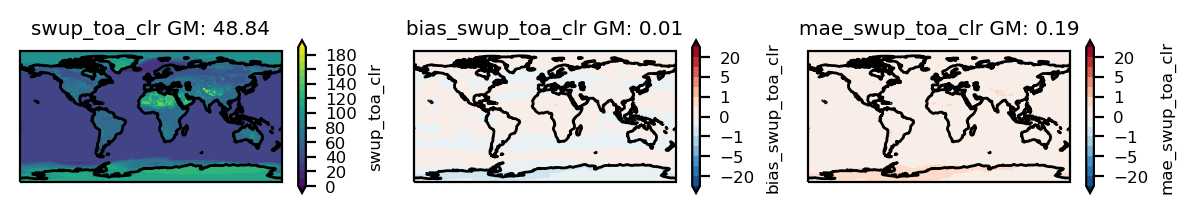

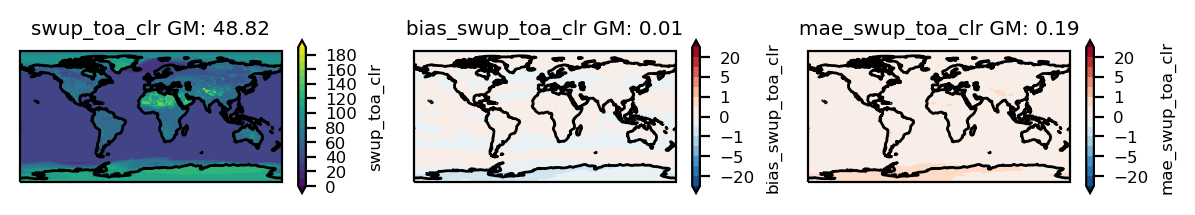

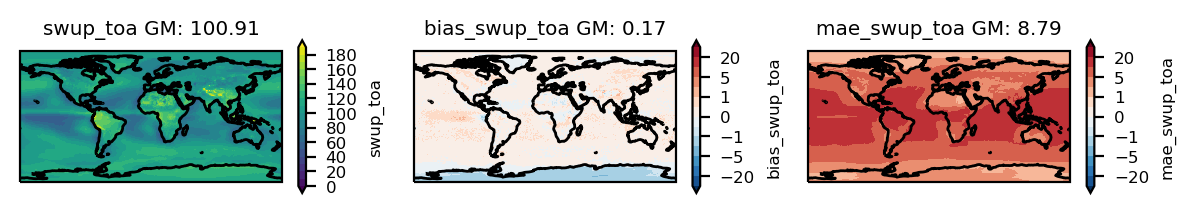

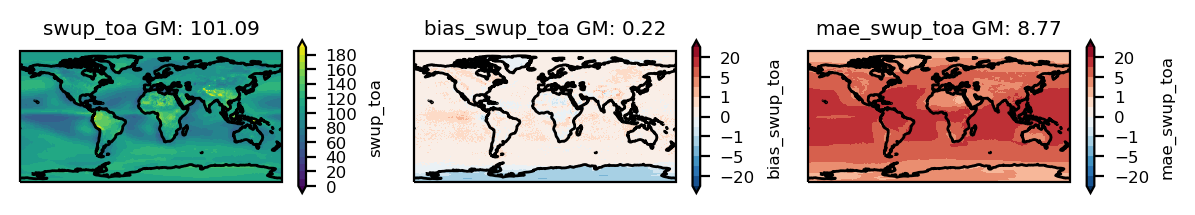

In [43]:
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_toa_clr',level = np.arange(0,200,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_toa_clr',level = np.arange(0,200,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_toa',level = np.arange(0,200,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_toa',level = np.arange(0,200,10), dlevel=dlevel)

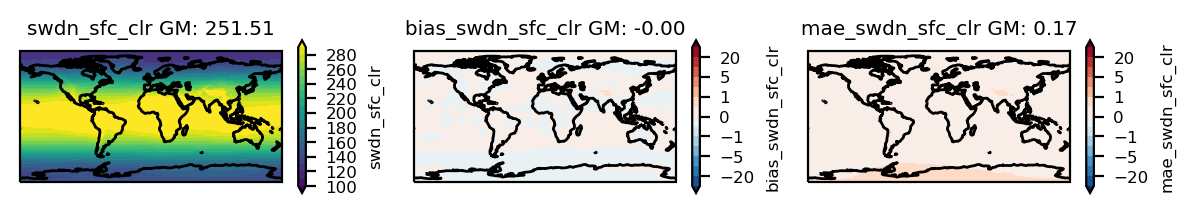

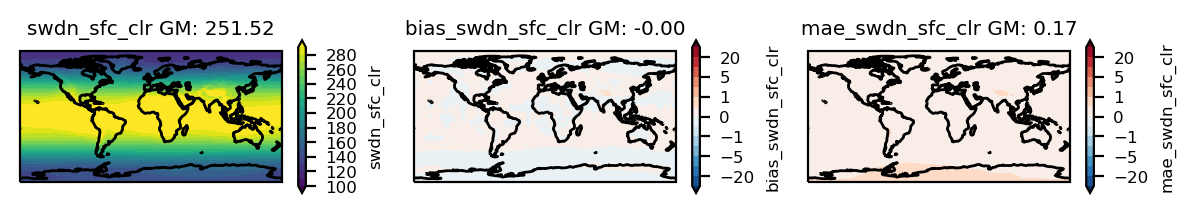

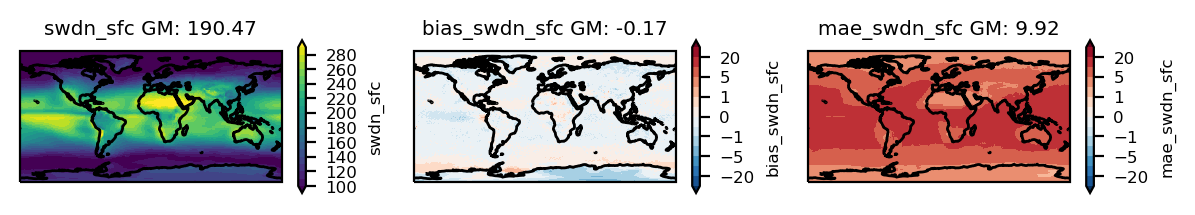

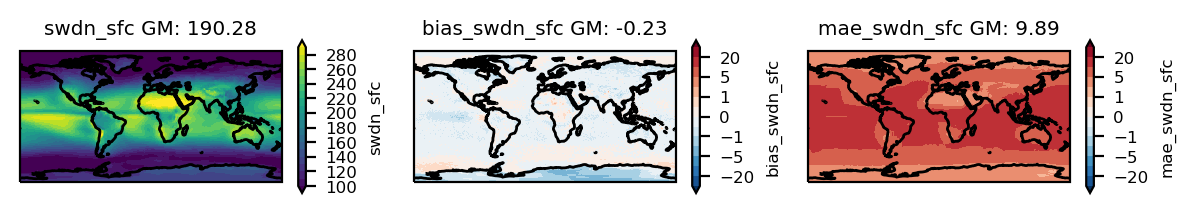

In [44]:

plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swdn_sfc_clr',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swdn_sfc',level = np.arange(100,300,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swdn_sfc',level = np.arange(100,300,10), dlevel=dlevel)

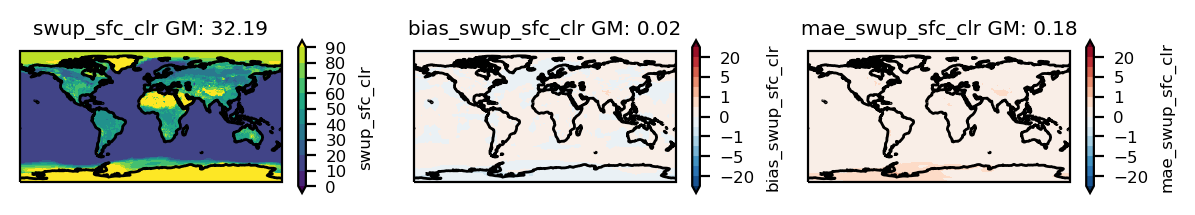

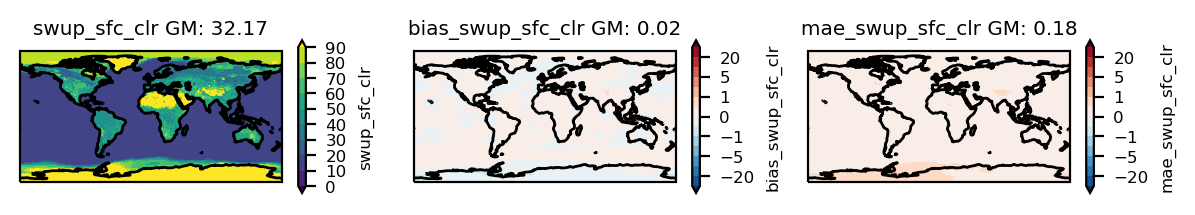

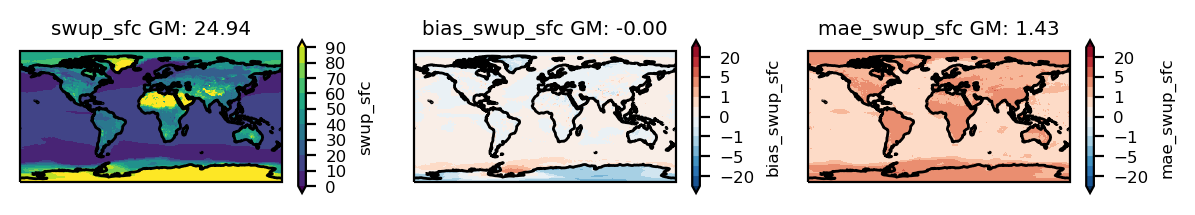

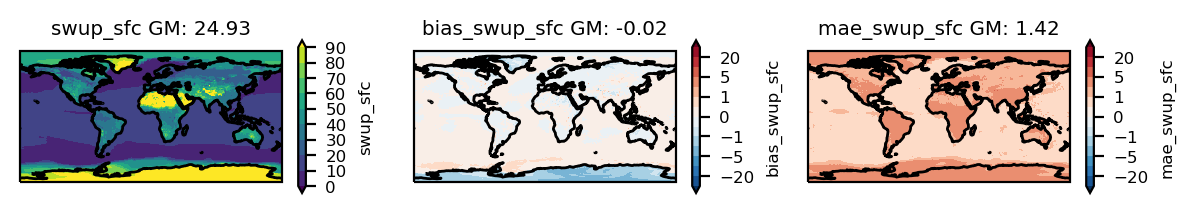

In [45]:

plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_sfc_clr',level = np.arange(0,100,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_sfc_clr',level = np.arange(0,100,10), dlevel=dlevel) 
plot_var_bias_mae(ds_nn_3h.sel(time=time_sel), 'swup_sfc',level = np.arange(0,100,10), dlevel=dlevel) 
plot_var_bias_mae(ds_ba_3h.sel(time=time_sel), 'swup_sfc',level = np.arange(0,100,10), dlevel=dlevel)

# Summarize Table

In [46]:
def table_flux_bias_mae_rmse(ds,var_name):
    print(f'{var_name:15s}',end = ' ')
    for var_pre in ['','bias_', 'mae_', 'rmse_']:
        da = ds[f'{var_pre}{var_name}'].mean(['time']).load()
        print(f'{global_mean_xarray(da).values:7.3f}',end = ' ')
    print('')
def table_tdt_bias_mae_rmse(ds,var_name):
    print(f'{var_name:15s}',end = ' ')
    for var_pre in ['','bias_', 'mae_', 'rmse_']:
        da = ds[f'{var_pre}{var_name}'].mean(['time','lon','pfull']).load()*86400
        print(f'{lat_weighted_mean_xarray(da).values:7.3f}',end = ' ')
    print('')

def print_all_table(ds):
    print('clear-sky')
    table_flux_bias_mae_rmse(ds, 'olr_clr')
    table_flux_bias_mae_rmse(ds, 'lwdn_sfc_clr')
    table_flux_bias_mae_rmse(ds, 'swup_sfc_clr')
    table_flux_bias_mae_rmse(ds, 'swup_toa_clr')
    table_flux_bias_mae_rmse(ds, 'swdn_sfc_clr')
    table_tdt_bias_mae_rmse (ds,  'tdt_sw_clr')
    table_tdt_bias_mae_rmse (ds,  'tdt_lw_clr')

    print('all-sky')
    table_flux_bias_mae_rmse(ds, 'olr')
    table_flux_bias_mae_rmse(ds, 'lwdn_sfc')
    table_flux_bias_mae_rmse(ds, 'swup_sfc')
    table_flux_bias_mae_rmse(ds, 'swup_toa')
    table_flux_bias_mae_rmse(ds, 'swdn_sfc')
    table_tdt_bias_mae_rmse (ds, 'tdt_sw')
    table_tdt_bias_mae_rmse (ds, 'tdt_lw')
    

## Diagnostic Mode

In [47]:
print_all_table(ds_ba_3h.sel(time=time_sel))

clear-sky
olr_clr         263.056   0.016   0.263   0.337 
lwdn_sfc_clr    317.617  -0.029   0.290   0.371 
swup_sfc_clr     32.173   0.018   0.181   0.322 
swup_toa_clr     48.820   0.010   0.194   0.343 
swdn_sfc_clr    251.516  -0.002   0.168   0.290 
tdt_sw_clr        1.033   0.000   0.005   0.008 
tdt_lw_clr       -1.741  -0.001   0.011   0.015 
all-sky
olr             239.136  -0.168   3.560   5.491 
lwdn_sfc        340.059   0.022   3.826   5.736 
swup_sfc         24.928  -0.021   1.416   2.895 
swup_toa        101.093   0.225   8.766  19.320 
swdn_sfc        190.279  -0.225   9.889  22.042 
tdt_sw            1.038   0.001   0.054   0.168 
tdt_lw           -1.733   0.000   0.208   0.439 


## Interactive Mode

In [48]:
print_all_table(ds_nn_3h.sel(time=time_sel))

clear-sky
olr_clr         263.071   0.028   0.272   0.349 
lwdn_sfc_clr    317.641  -0.050   0.304   0.389 
swup_sfc_clr     32.192   0.018   0.181   0.322 
swup_toa_clr     48.836   0.012   0.193   0.342 
swdn_sfc_clr    251.507  -0.004   0.168   0.291 
tdt_sw_clr        1.033   0.000   0.005   0.008 
tdt_lw_clr       -1.740  -0.001   0.012   0.016 
all-sky
olr             239.254  -0.201   3.579   5.508 
lwdn_sfc        339.992   0.051   3.870   5.787 
swup_sfc         24.943  -0.003   1.427   2.935 
swup_toa        100.911   0.172   8.790  19.376 
swdn_sfc        190.474  -0.169   9.921  22.107 
tdt_sw            1.038   0.001   0.055   0.171 
tdt_lw           -1.732  -0.000   0.210   0.442 


# Figure For paper

# clear-sky results

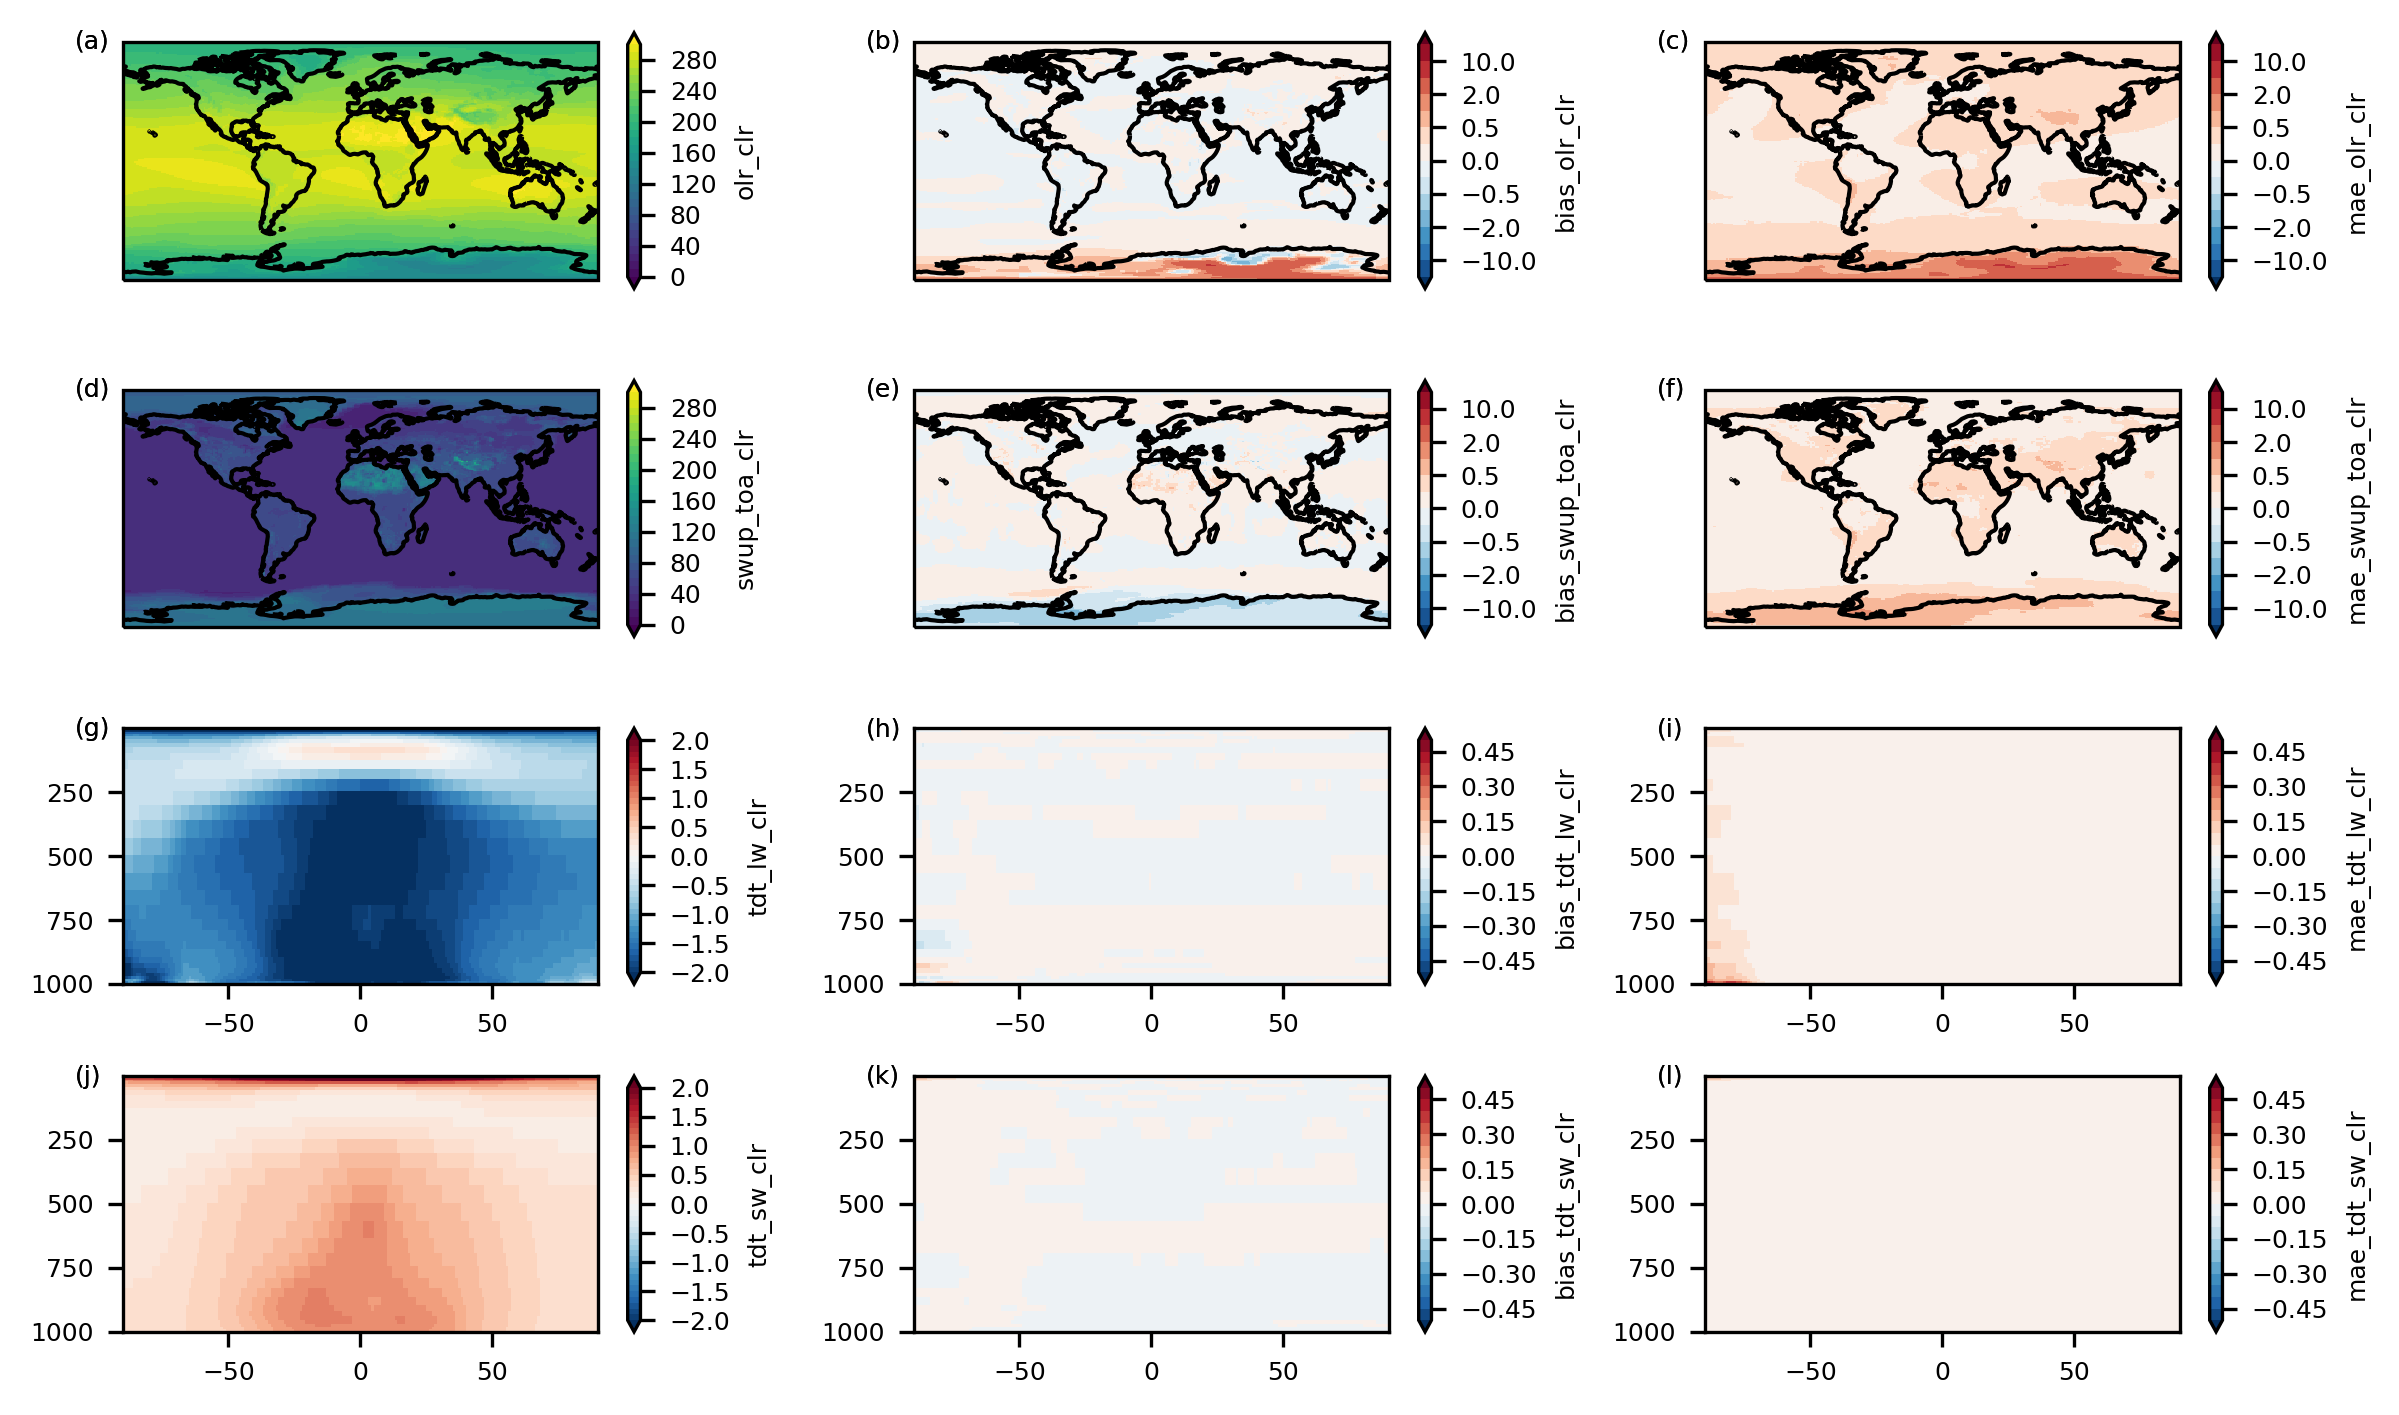

In [66]:
# use diagnose results
ds = ds_ba_3h
fig = plt.figure(figsize=(8,4.7),dpi=300)
axs = []
for i in range(6):
    ax = fig.add_subplot(4,3,i+1,projection =ccrs.PlateCarree())
    ax.coastlines()
    axs.append(ax)
# flux
level = np.arange(0,300.1,10)
dlevel = np.array([-20, -10, -5,-2,-1,-0.5,-0.2,0,0.2,0.5,1,2,5,10,20])  
vi_off,var_name = 0+1, 'olr_clr'
da = ds[f'{var_name}'].mean('time')
da.plot(ax=axs[vi_off-1], levels=level, extend='both') 
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean('time')
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')  
vi_off,var_name = 3+1, 'swup_toa_clr'
da = ds[f'{var_name}'].mean('time')
da.plot(ax=axs[vi_off-1], levels=level, extend='both')  
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean('time')
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')  
    
# heating rate
for i in range(6,12):
    ax = fig.add_subplot(4,3,i+1)
    axs.append(ax)
level = np.arange(-2,2.01,0.1)
dlevel = np.arange(-0.5,0.51,0.05)
vi_off,var_name = 6+1, 'tdt_lw_clr'
da = ds[f'{var_name}'].mean(['time','lon']).load()*86400
da.plot(ax=axs[vi_off-1], levels=level, extend='both')
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')
vi_off,var_name = 9+1, 'tdt_sw_clr'
da = ds[f'{var_name}'].mean(['time','lon']).load()*86400
da.plot(ax=axs[vi_off-1], levels=level, extend='both')
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')

for ai, ax in enumerate(axs[6:]):
    ax.set(xlabel=None,ylabel=None)
    ax.invert_yaxis()
abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.1,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.1,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes) 
fig.tight_layout()  
plt.savefig('fig3_clrsky.pdf')

# all-sky results

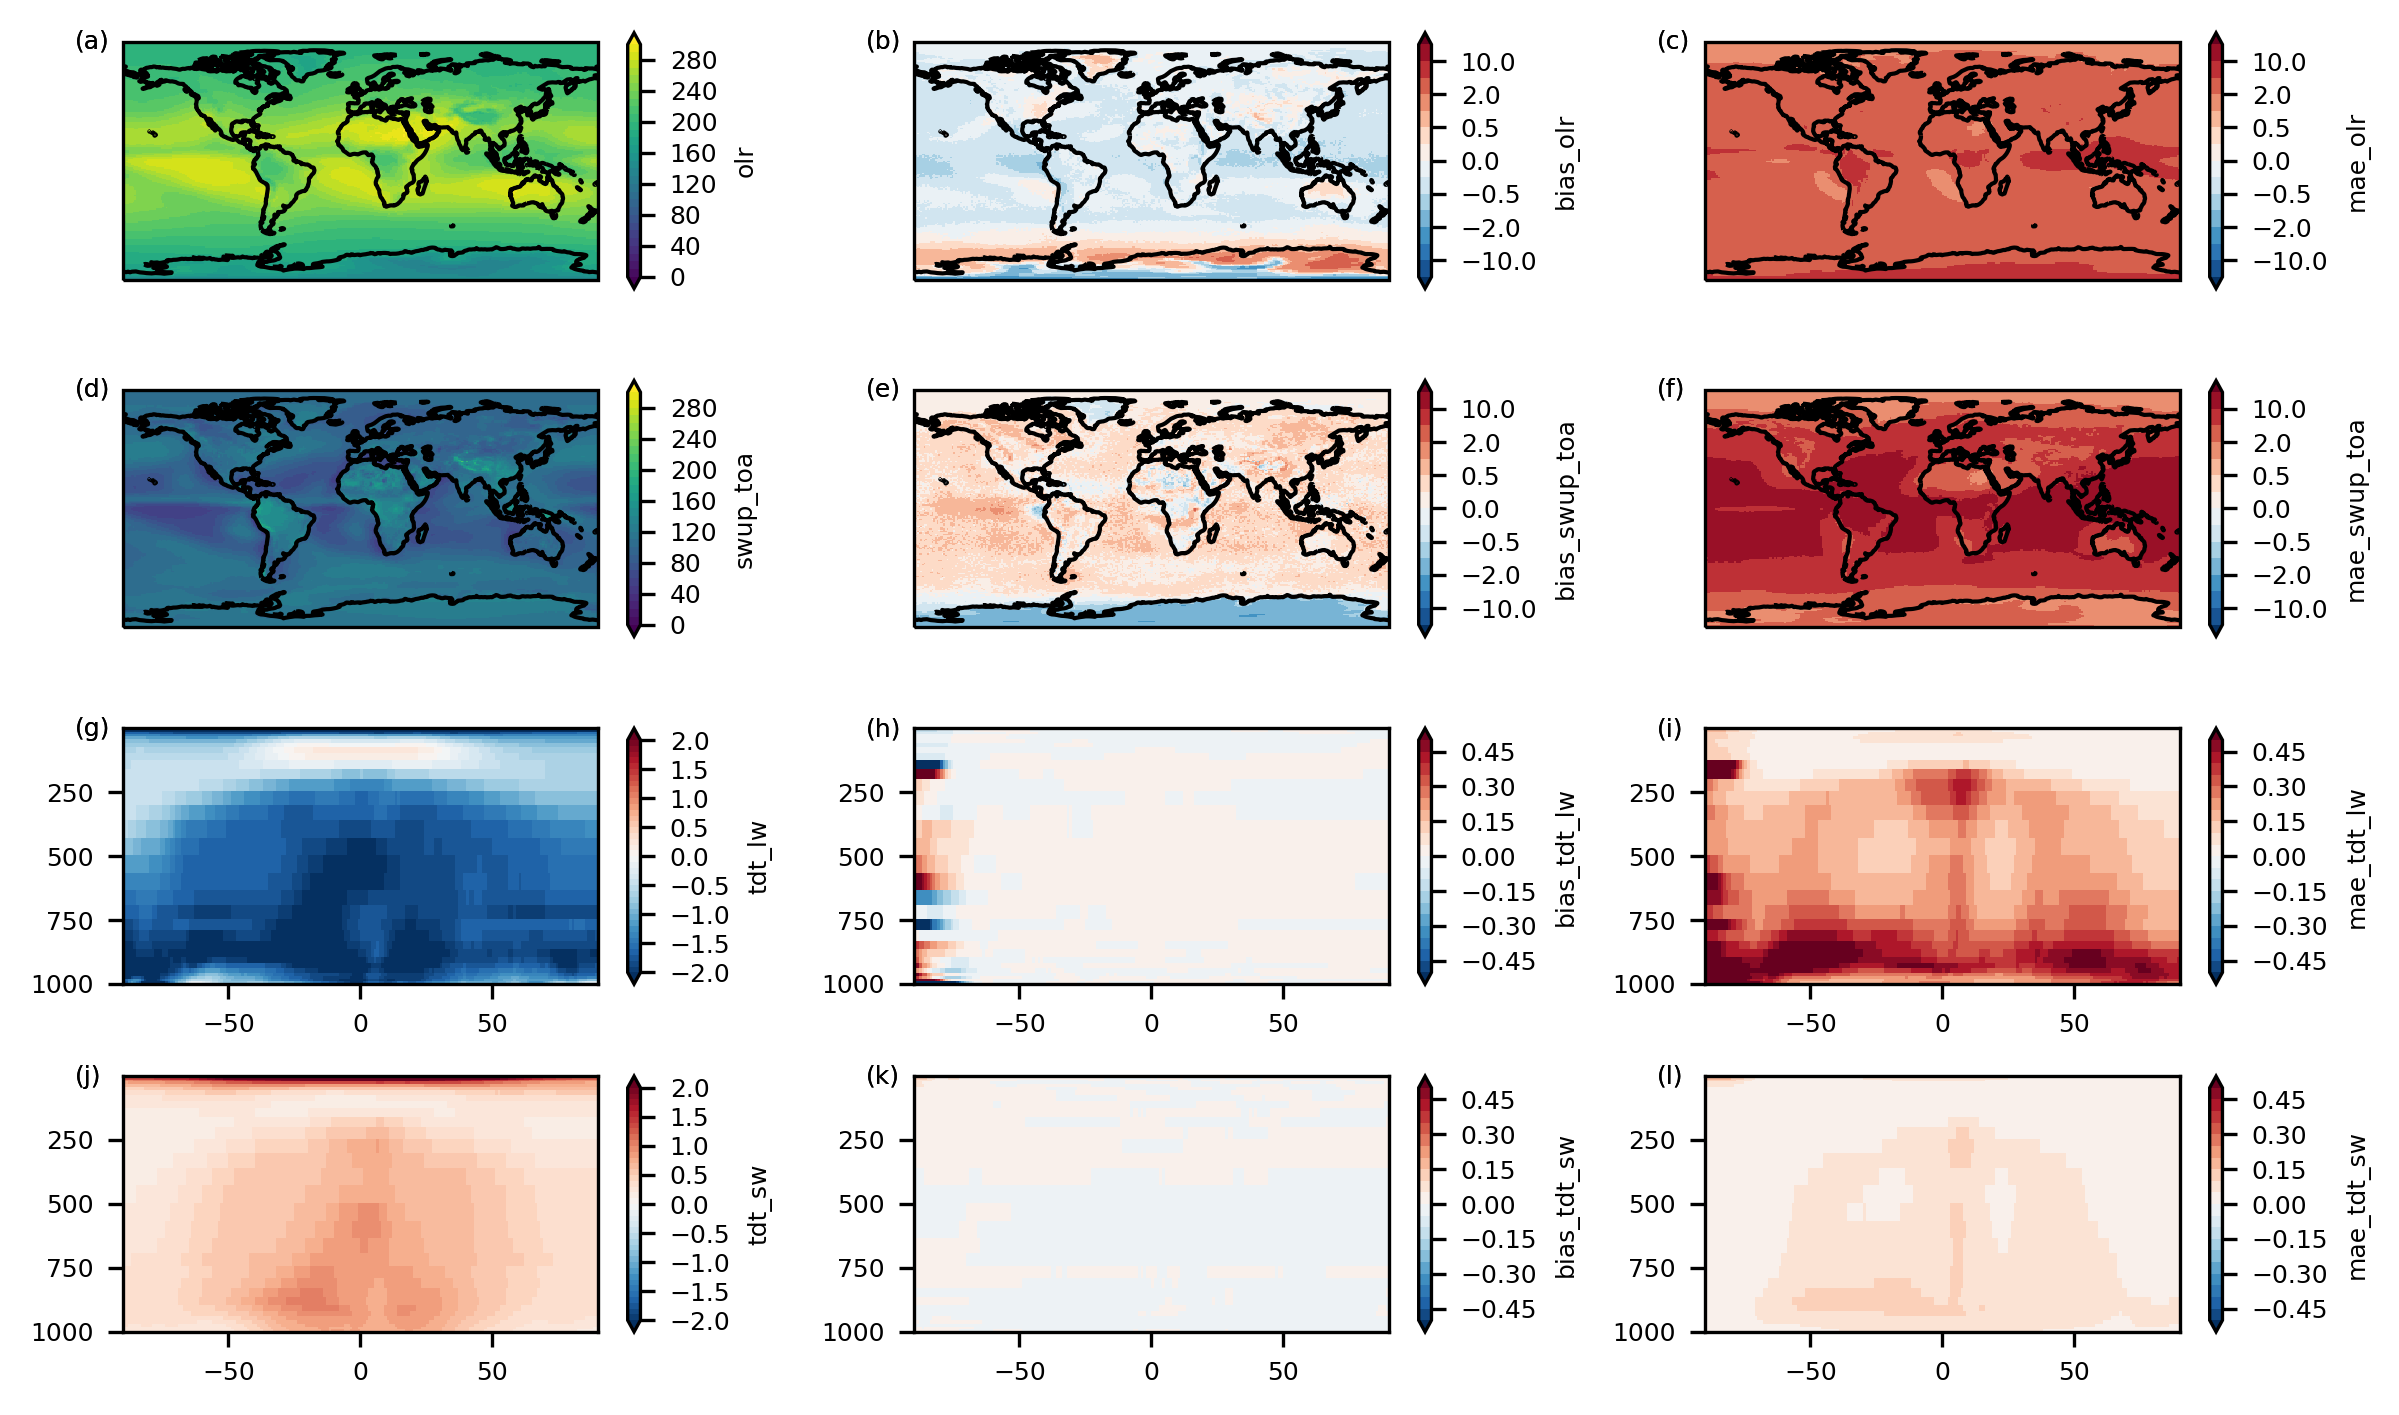

In [67]:
# use diagnose results
ds = ds_ba_3h
fig = plt.figure(figsize=(8,4.7),dpi=300)
axs = []
for i in range(6):
    ax = fig.add_subplot(4,3,i+1,projection =ccrs.PlateCarree())
    ax.coastlines()
    axs.append(ax)
# flux
level = np.arange(0,300.1,10)
dlevel = np.array([-20, -10, -5,-2,-1,-0.5,-0.2,0,0.2,0.5,1,2,5,10,20])  
vi_off,var_name = 0+1, 'olr'
da = ds[f'{var_name}'].mean('time')
da.plot(ax=axs[vi_off-1], levels=level, extend='both') 
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean('time')
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')  
vi_off,var_name = 3+1, 'swup_toa'
da = ds[f'{var_name}'].mean('time')
da.plot(ax=axs[vi_off-1], levels=level, extend='both')  
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean('time')
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')  
    
# heating rate
for i in range(6,12):
    ax = fig.add_subplot(4,3,i+1)
    axs.append(ax)
level = np.arange(-2,2.01,0.1)
dlevel = np.arange(-0.5,0.51,0.05)
vi_off,var_name = 6+1, 'tdt_lw'
da = ds[f'{var_name}'].mean(['time','lon']).load()*86400
da.plot(ax=axs[vi_off-1], levels=level, extend='both')
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')
vi_off,var_name = 9+1, 'tdt_sw'
da = ds[f'{var_name}'].mean(['time','lon']).load()*86400
da.plot(ax=axs[vi_off-1], levels=level, extend='both')
for vi, var_pre in enumerate(['bias_', 'mae_']):
    da = ds[f'{var_pre}{var_name}'].mean(['time','lon']).load()*86400
    da.plot(ax=axs[vi_off+vi], levels=dlevel, extend='both')

for ai, ax in enumerate(axs[6:]):
    ax.invert_yaxis()
    ax.set(xlabel=None,ylabel=None)
abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.1,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.1,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes) 
fig.tight_layout()  
plt.savefig('fig4_allsky.pdf')

In [51]:
44.3*768/360/8/96/96/6   *1e3

0.21363811728395057

In [52]:
(118.5+78.0)/44.3

4.435665914221219

## sphum temperature diff

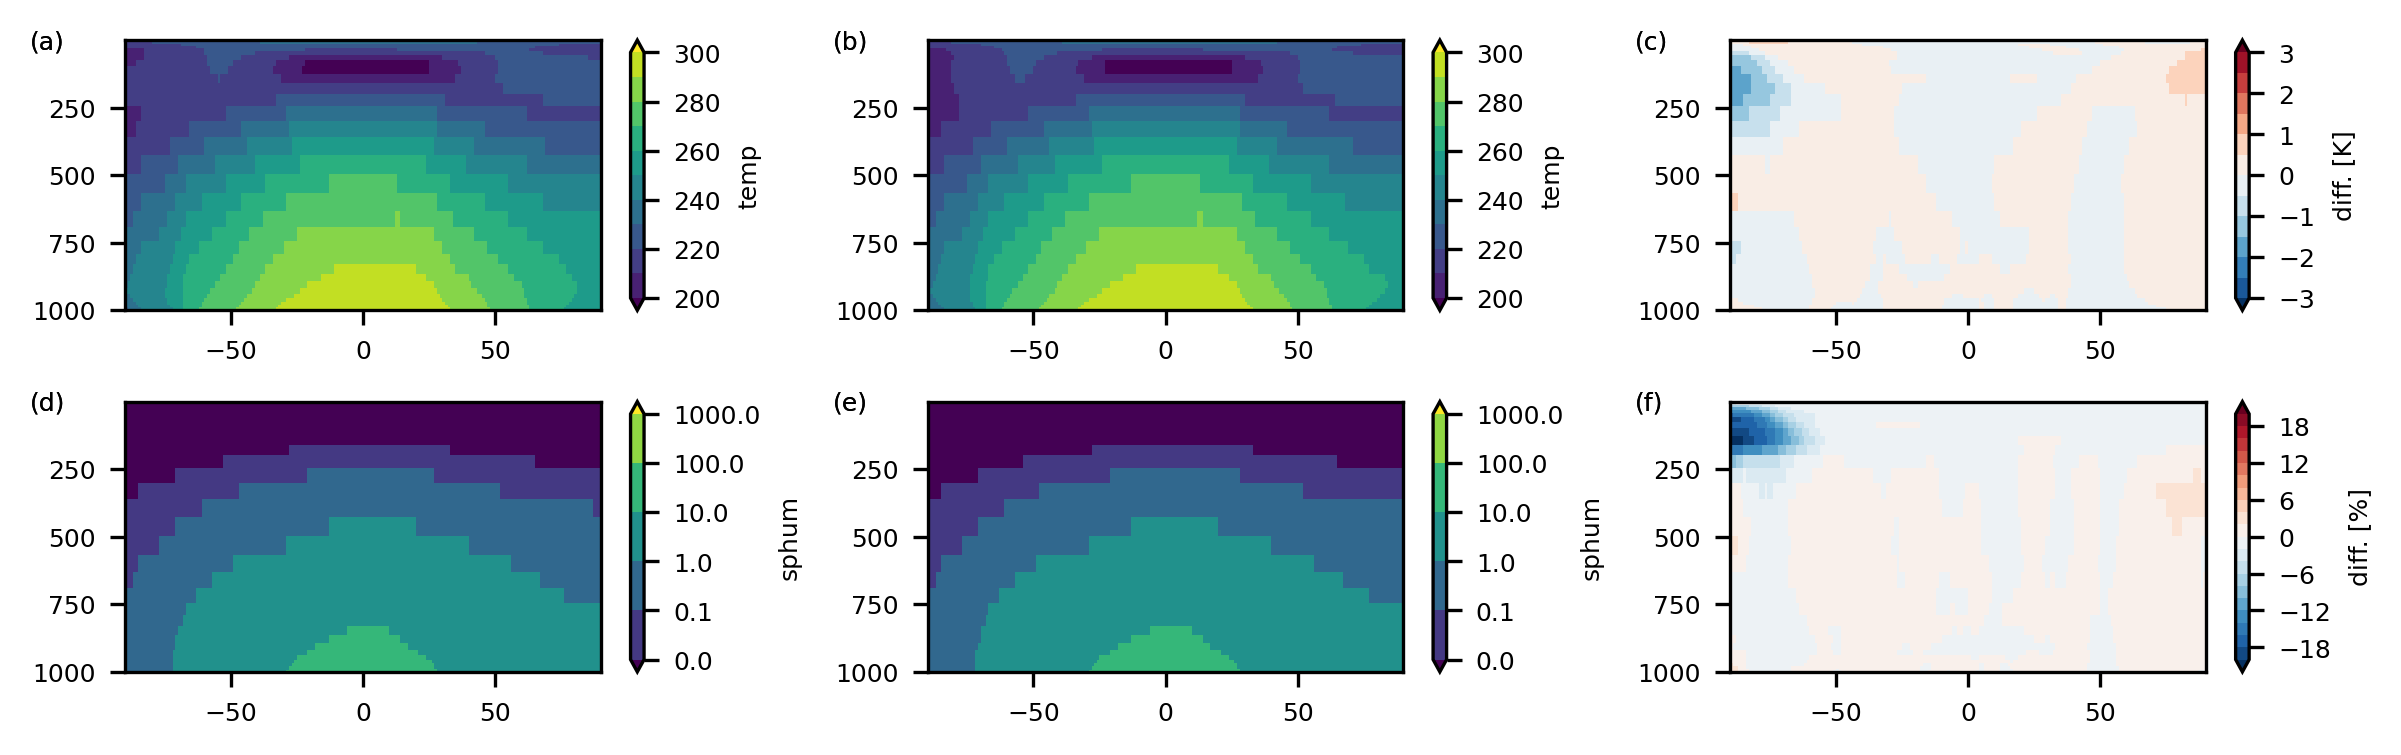

In [69]:
# use diagnose results

fig = plt.figure(figsize=(8,2.5),dpi=300)
axs = []
# zonal mean
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    axs.append(ax)
    
level = 10**np.arange(-2,3.1,1)
dlevel = np.arange(-20,20.1,2)
vi_off,var_name = 3+1, 'sphum'
da1 = ds_ba[var_name].mean(['time','lon'])*1e3
da1.plot(ax=axs[vi_off-1], levels=level, extend='both') 
da2 = ds_nn[var_name].mean(['time','lon'])*1e3
da2.plot(ax=axs[vi_off], levels=level, extend='both') 
da = ((da2-da1)/da1*100).rename(f'diff. [%]')
da.plot(ax=axs[vi_off+1], levels=dlevel, extend='both') 
    
# zonal mean
level = np.arange(200,300.1,10)
dlevel = np.arange(-3,3.1,0.5)
vi_off,var_name = 0+1, 'temp'
da1 = ds_ba[var_name].mean(['time','lon'])
da1.plot(ax=axs[vi_off-1], levels=level, extend='both') 
da2 = ds_nn[var_name].mean(['time','lon'])
da2.plot(ax=axs[vi_off], levels=level, extend='both') 
da = (da2-da1).rename(f'diff. [K]')
da.plot(ax=axs[vi_off+1], levels=dlevel, extend='both') 

for ai, ax in enumerate(axs):
    ax.invert_yaxis()
    ax.set(xlabel=None,ylabel=None)
abc_list='abcdefghijklmn'
for ai, ax in enumerate(axs ):
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes)
    ax.text(-0.2,0.97,f'({abc_list[ai]})',
                     transform=ax.transAxes) 
fig.tight_layout()  
plt.savefig('fig7_temp_sphum.pdf')

## ener